In [27]:
using LilGuys
using CairoMakie
using Arya

In [61]:
using Printf

In [2]:
using OrderedCollections

In [31]:
CairoMakie.activate!(type=:png)

In [9]:
function get_orbit(modelname, orbitname)
    return LilGuys.Orbit(joinpath(modelname * "_special_cases", orbitname * ".csv"))
end

get_orbit (generic function with 2 methods)

In [11]:
function get_old_orbit(modelname, orbitname)
    return LilGuys.Orbit(joinpath(ENV["DWARFS_ROOT"], "analysis/sculptor/mc_orbits", 
            modelname * "_special_cases", orbitname * ".csv"))
end

get_old_orbit (generic function with 2 methods)

In [12]:
get_orbits(modelname, orbitname) = [get_orbit(modelname, orbitname), get_old_orbit(modelname, orbitname)]

get_orbits (generic function with 1 method)

In [24]:
function plot_orbits(orbits)
    LilGuys.plot_xyz(LilGuys.positions.(orbits)...)
end

plot_orbits (generic function with 1 method)

In [67]:
function plot_orbits_diff(orbits)

    t = orbits[1].times .+ (orbits[2].times[end] - orbits[1].times[end])
    t_filt = t .> orbits[2].times[1]
    t = t[t_filt]
    LilGuys.plot_xyz(orbits[1].positions[:, t_filt] .- LilGuys.resample(orbits[2], t).positions, plot=:scatter, labels=["agama", "gadget"])
end

plot_orbits_diff (generic function with 1 method)

In [71]:
function plot_r_t_orbits(orbits)
    t = orbits[1].times .+ (orbits[2].times[end] - orbits[1].times[end])

    fig = Figure()
    ax = Axis(fig[1,1], xlabel = "time / Gyr", ylabel = "gc radii / kpc")
    
    lines!(t * T2GYR, radii(orbits[1]))
    lines!(orbits[2].times * T2GYR, radii(orbits[2]))

    fig
end

plot_r_t_orbits (generic function with 1 method)

In [153]:
function print_orbits_stats(orbits; i0=2)
    t = orbits[1].times .+ (orbits[2].times[end] - orbits[1].times[end])

    dt_end = t[i0] - orbits[02].times[1]
    @printf "time final = %.4f \n" orbits[2].times[1] * T2GYR
    @printf "delta t final = %0.4f Gyr \n" dt_end * T2GYR
    println()
    @printf "pos_new = %8.2f %8.2f %8.2f \n" orbits[1].positions[:, i0]...
    @printf "pos_old = %8.2f %8.2f %8.2f \n" orbits[2].positions[:, 1]...
    @printf "dx_i    = %8.2f %8.2f %8.2f \n" (orbits[1].positions[:, i0] .- orbits[2].positions[:, 1])...

    println()
    @printf "vel_new = %8.2f %8.2f %8.2f \n" V2KMS * orbits[1].velocities[:, i0]...
    @printf "vel_old = %8.2f %8.2f %8.2f \n" V2KMS * orbits[2].velocities[:, 1]...
    @printf "dv_i    = %8.2f %8.2f %8.2f \n" V2KMS * (orbits[1].velocities[:, i0] .- orbits[2].velocities[:, 1])...

end

print_orbits_stats (generic function with 2 methods)

In [135]:
function compare(orbits; i0=1)

    print_orbits_stats(orbits, i0=i0)
    display(plot_orbits(orbits))
    display(plot_orbits_diff(orbits))
    display(plot_r_t_orbits(orbits))

end

compare (generic function with 2 methods)

time final = 0.5320 
delta t final = -0.0072 Gyr 

pos_new =    -2.28   -42.64    86.51 
pos_old =    -2.43   -43.48    86.08 
dx_i    =     0.15     0.84     0.43 

vel_new =   -20.23  -115.17   -57.07 
vel_old =   -20.16  -113.91   -59.60 
dv_i    =    -0.07    -1.26     2.53 


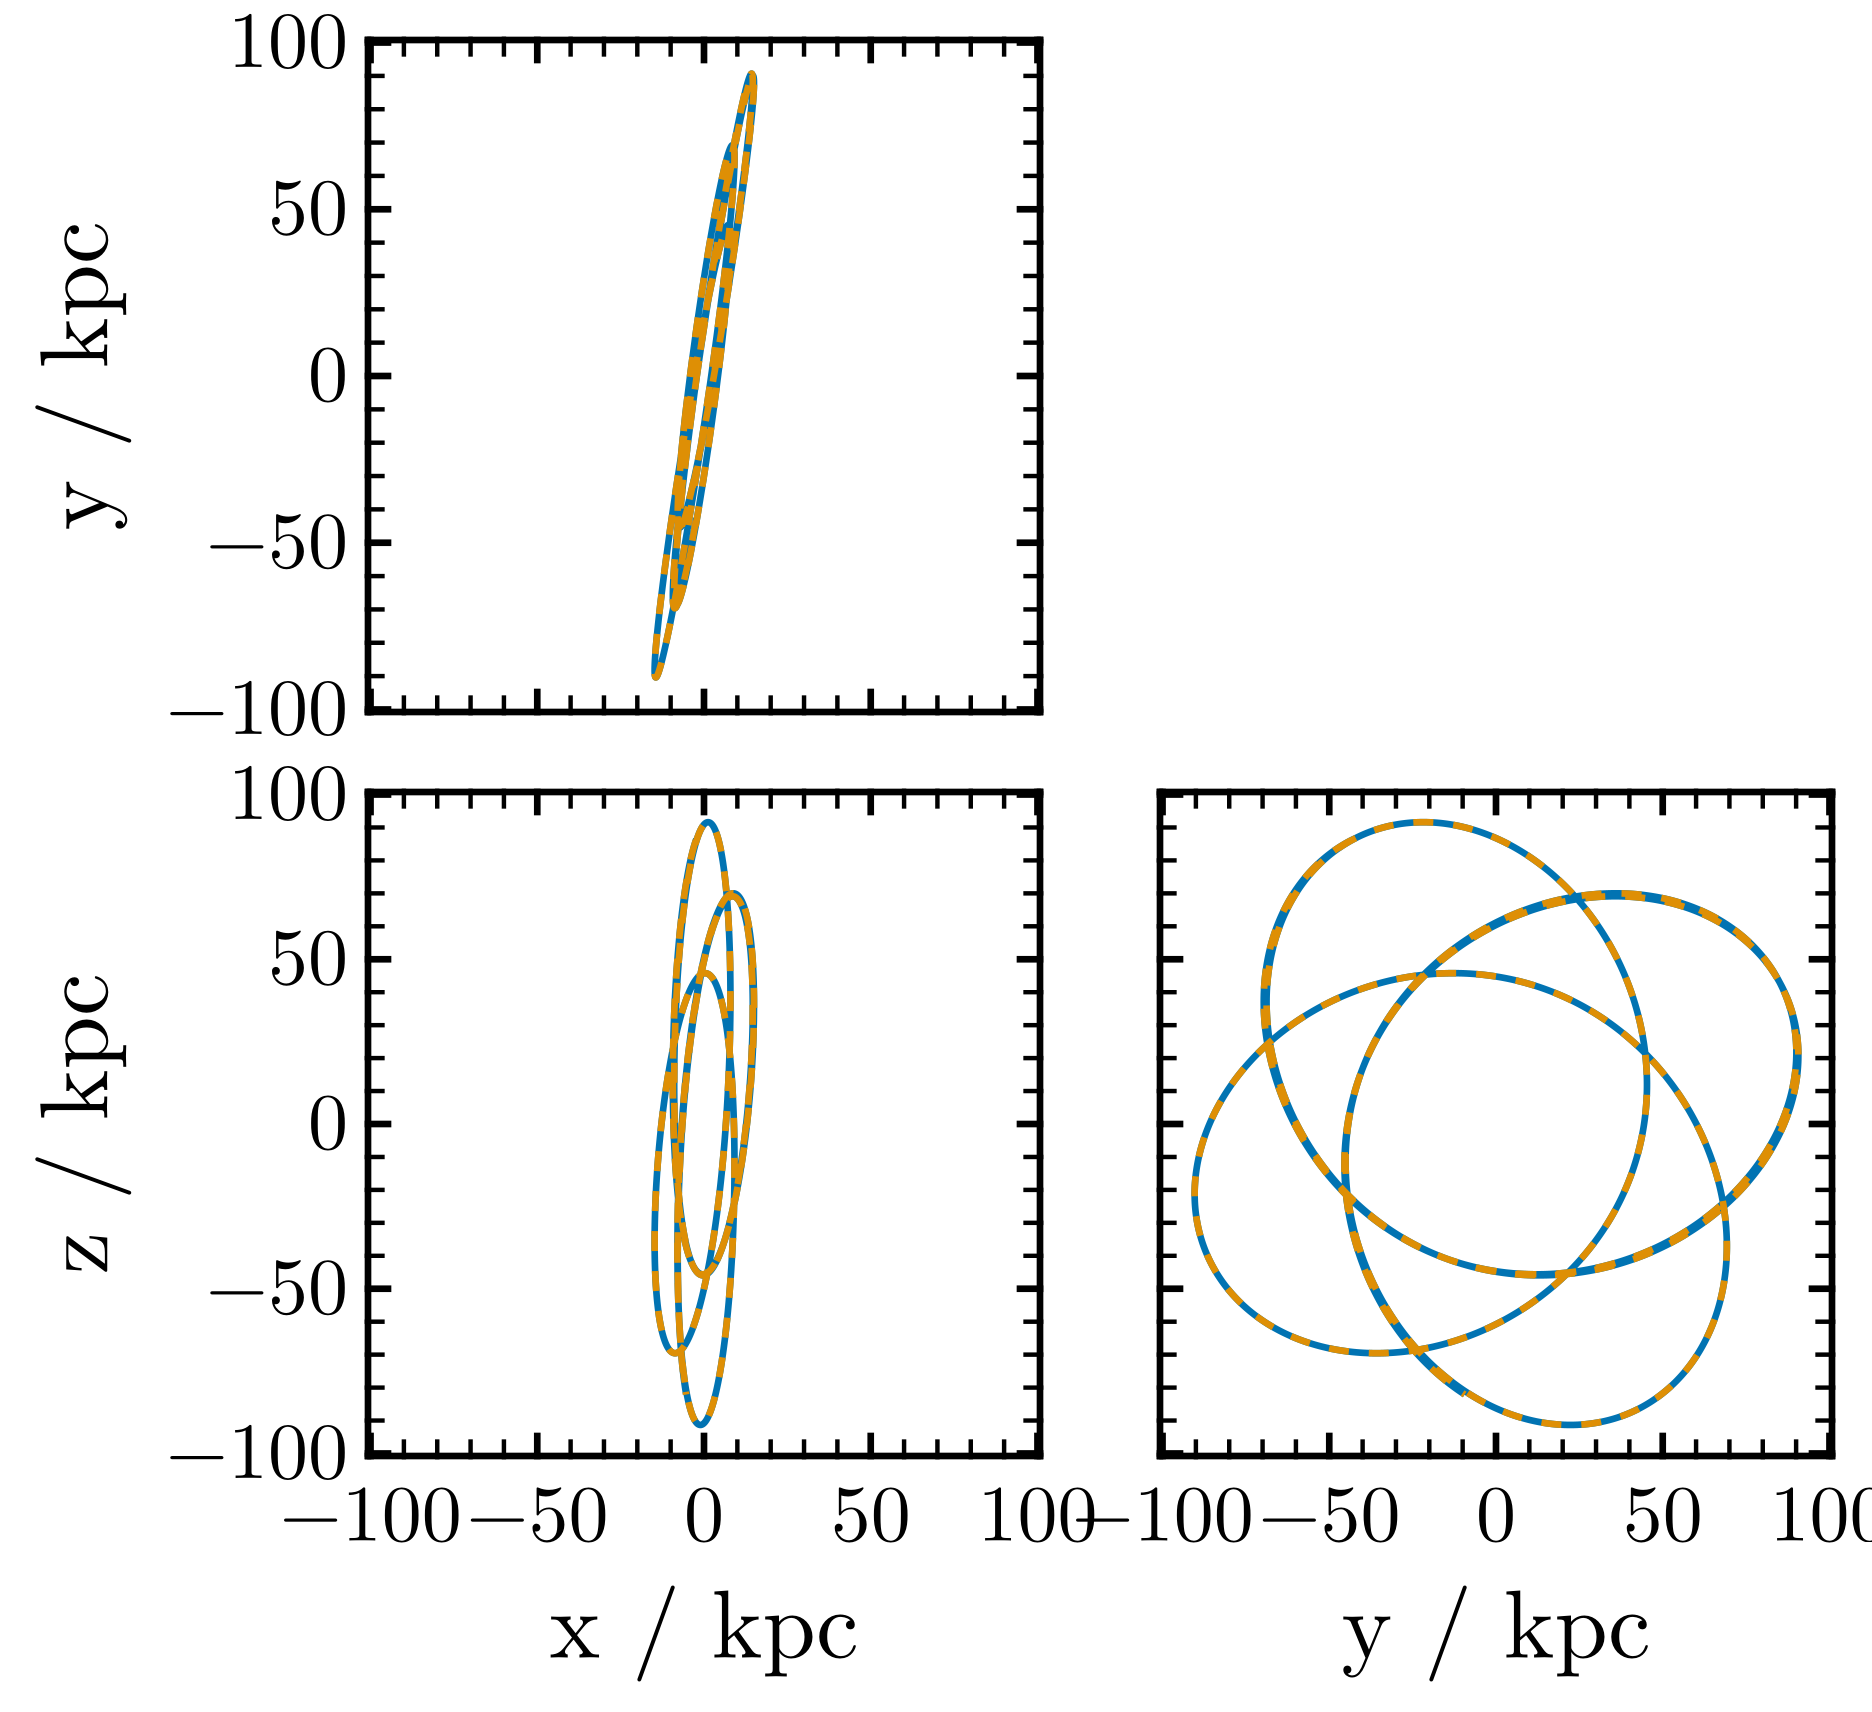

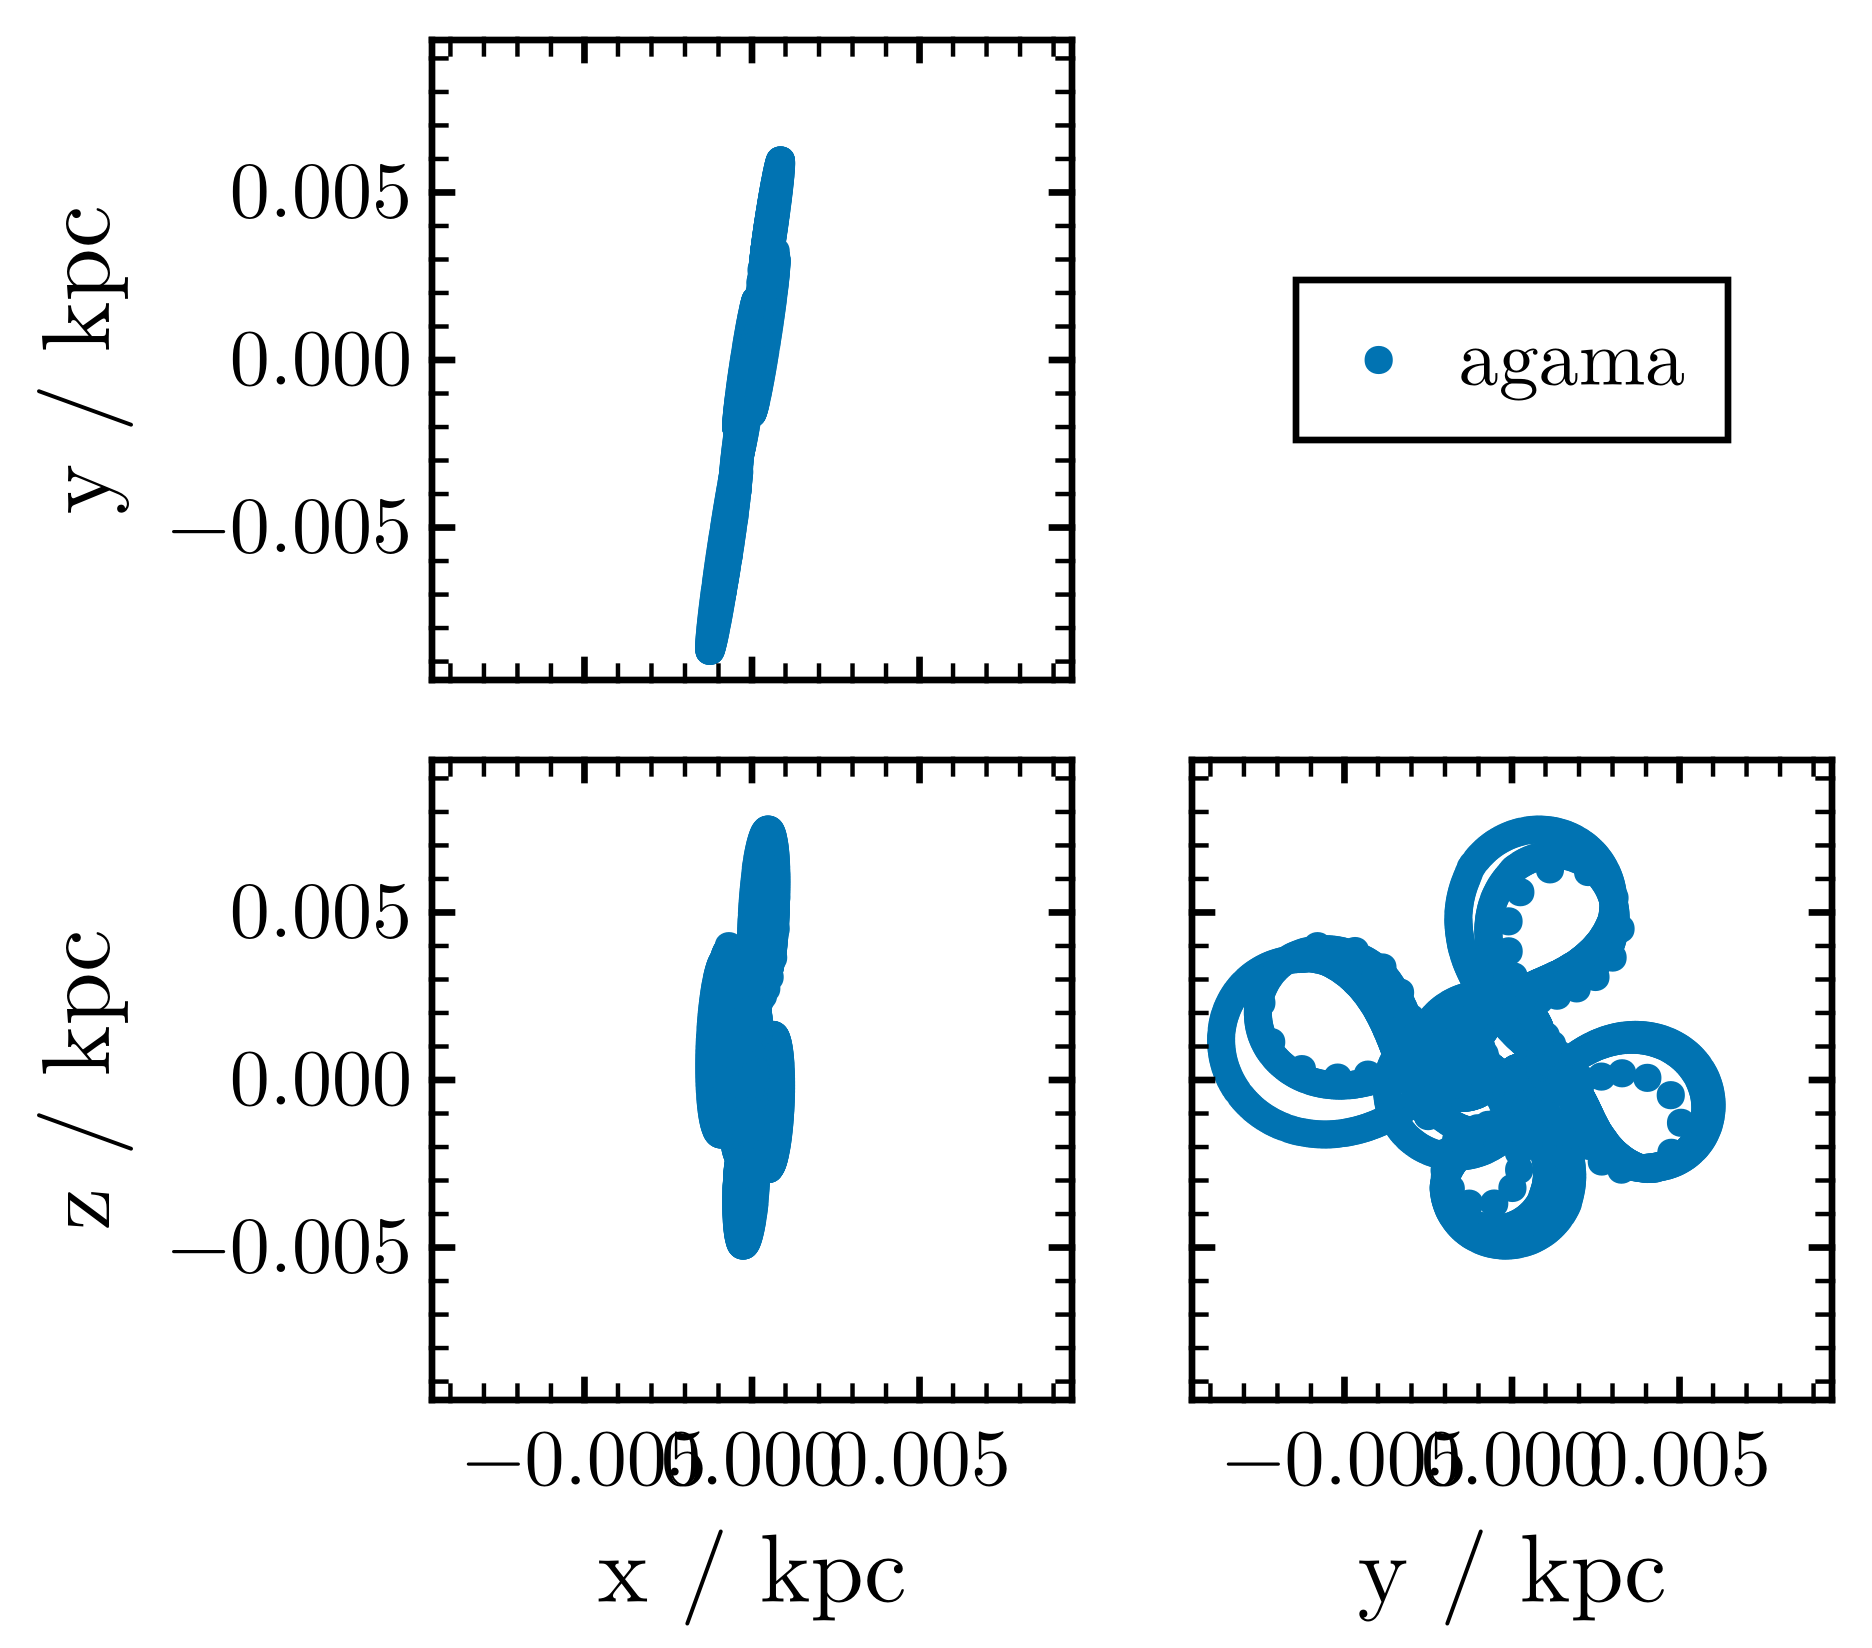

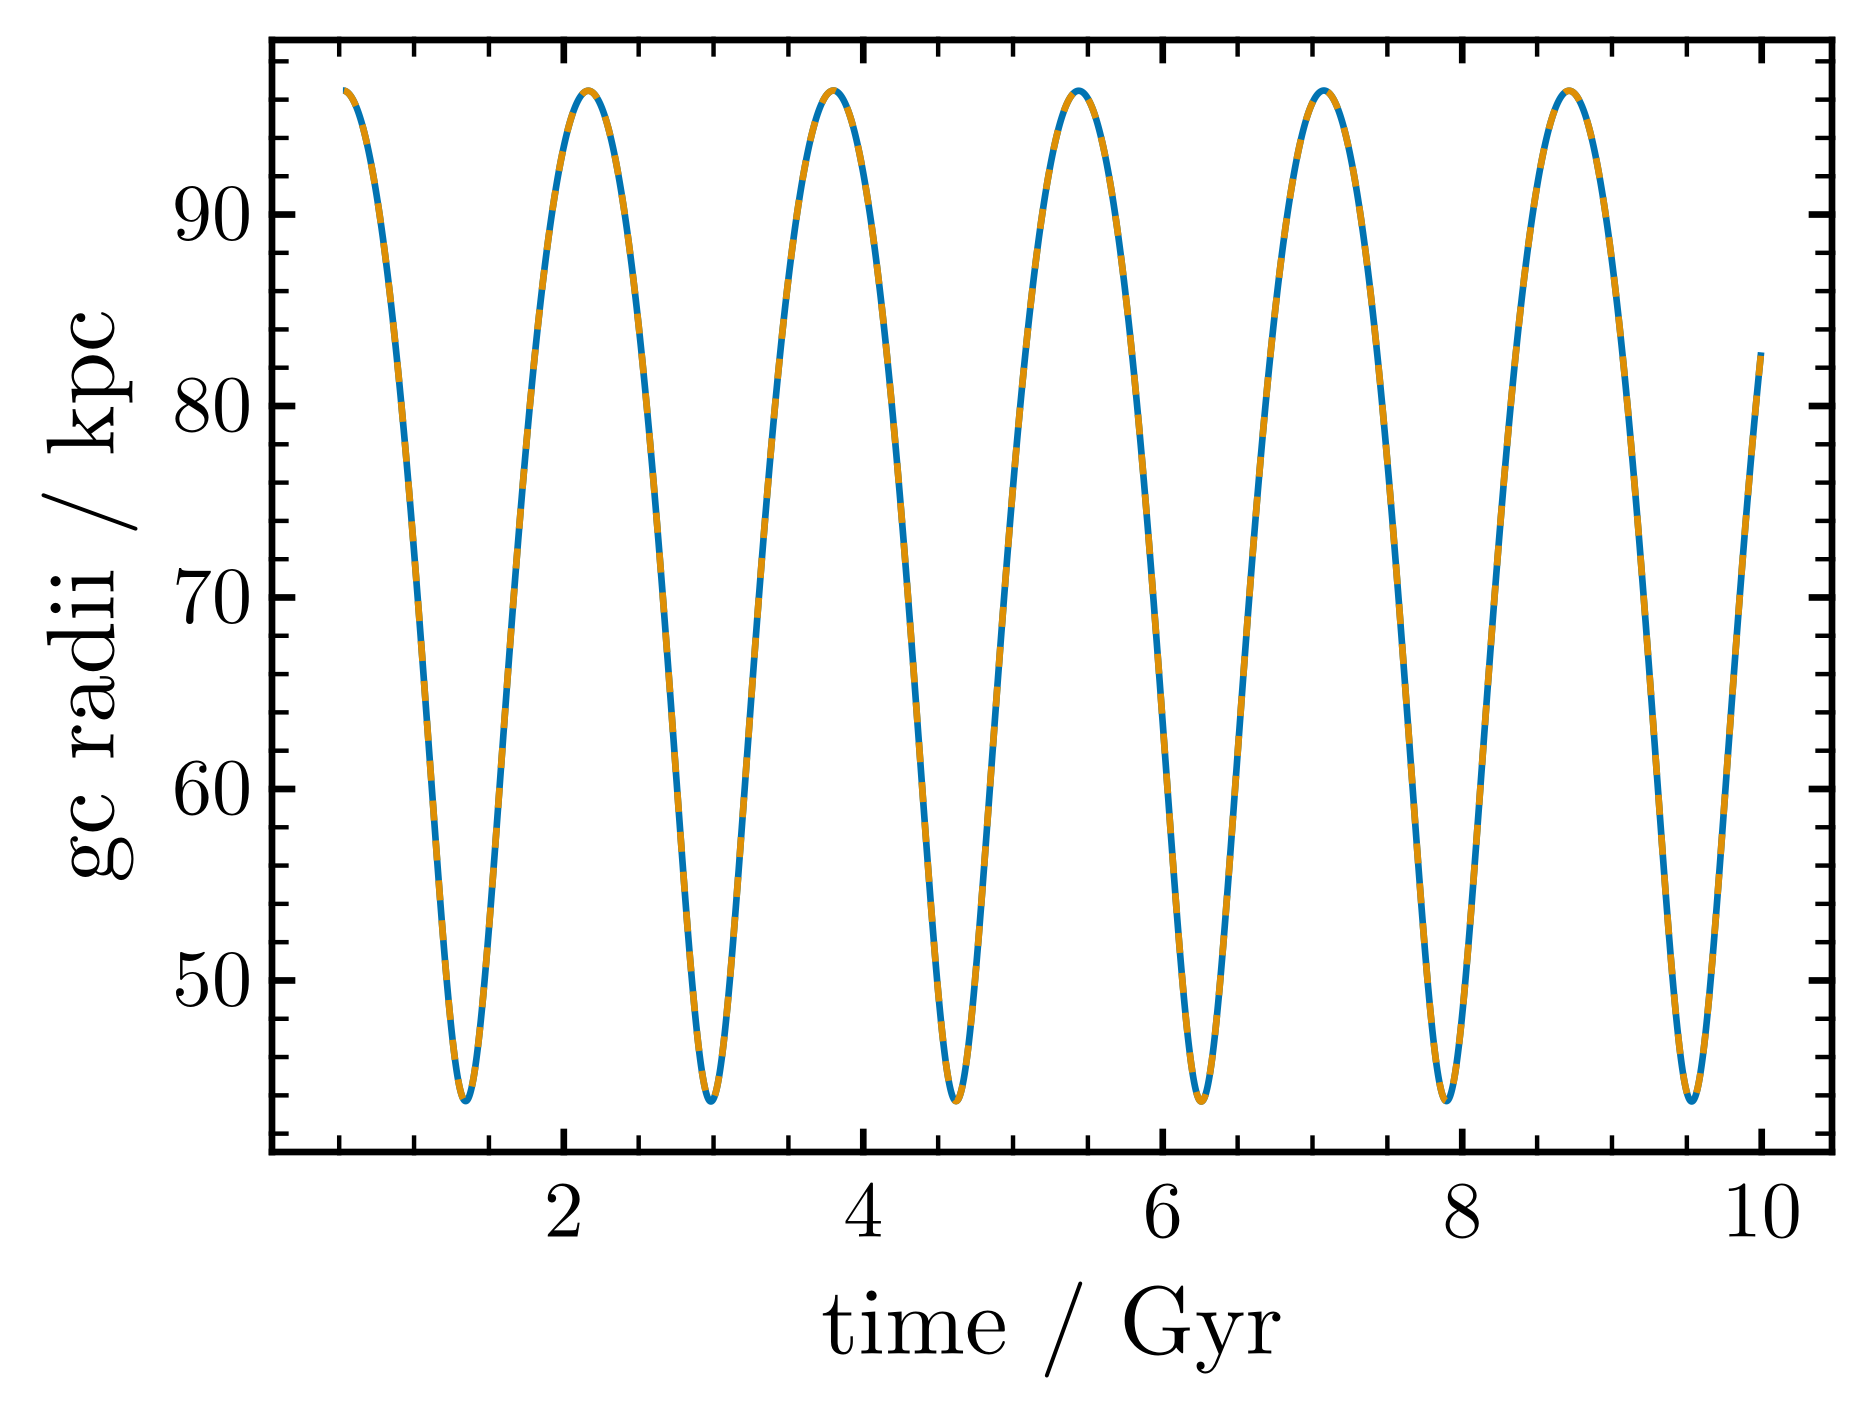

CairoMakie.Screen{IMAGE}


In [154]:
orbits_mean = get_orbits("EP2020", "orbit_smallperi")
compare(orbits_mean, i0=1)

delta t final = 0.0003 Gyr 

pos_new =    16.13    92.49    39.59 
pos_old =    16.15    92.32    40.20 
dx_i    =    -0.01     0.17    -0.61 

vel_new =    -2.35   -54.60   129.00 
vel_old =    -2.59   -55.88   128.31 
dv_i    =     0.24     1.28     0.69 


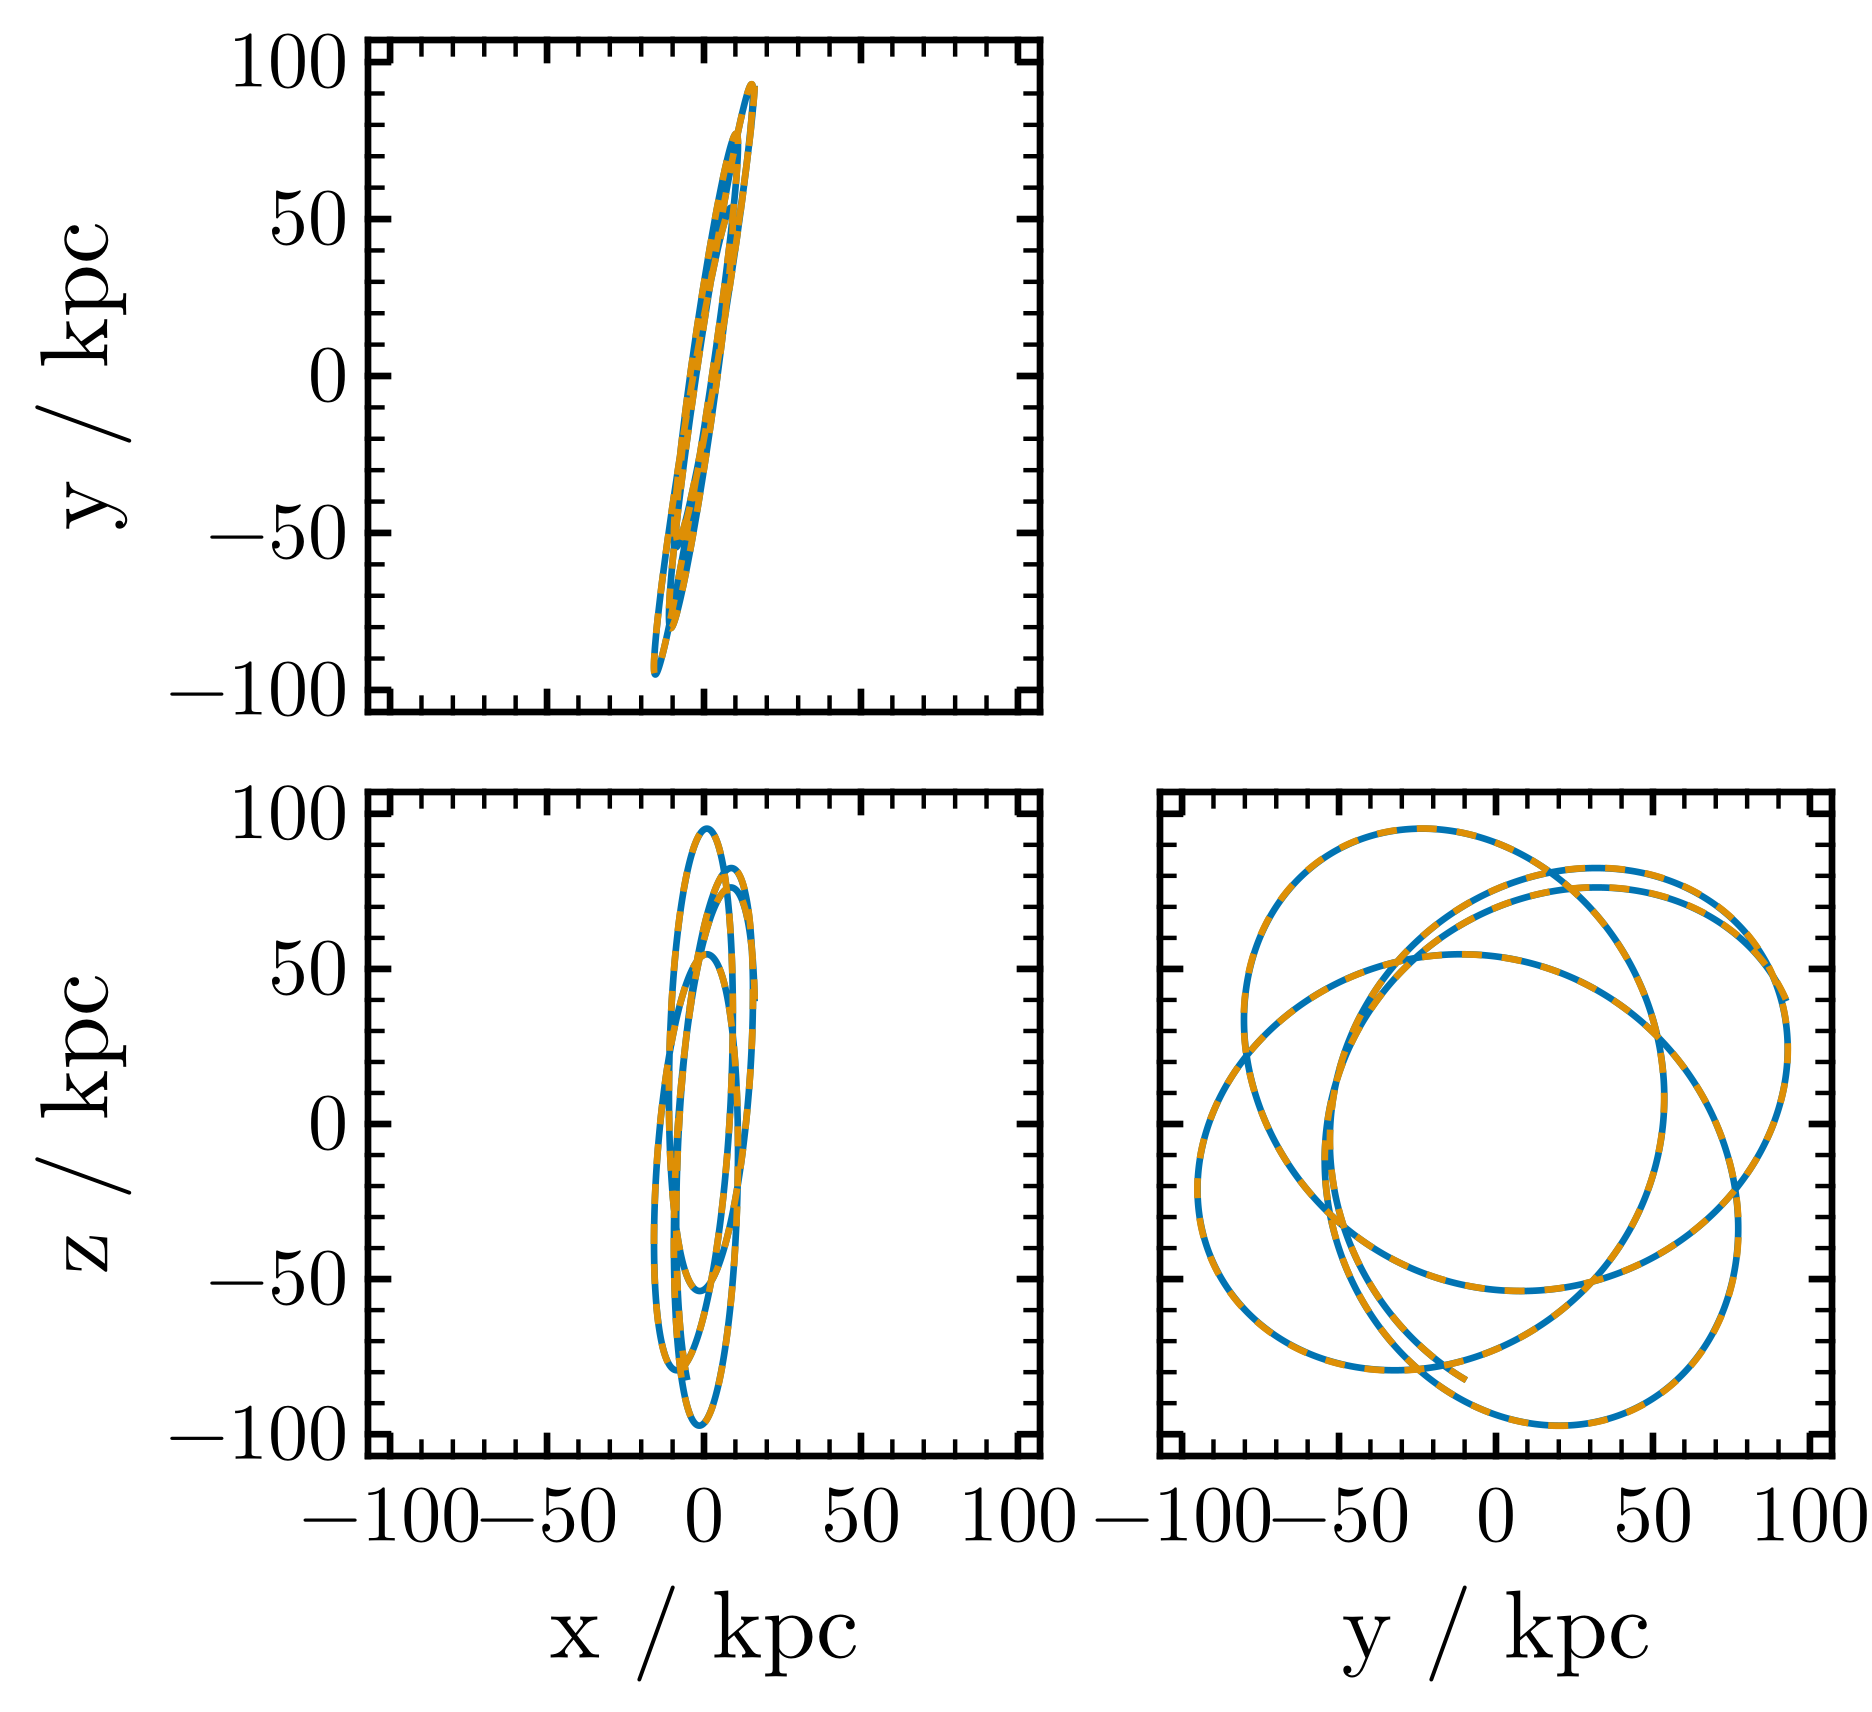

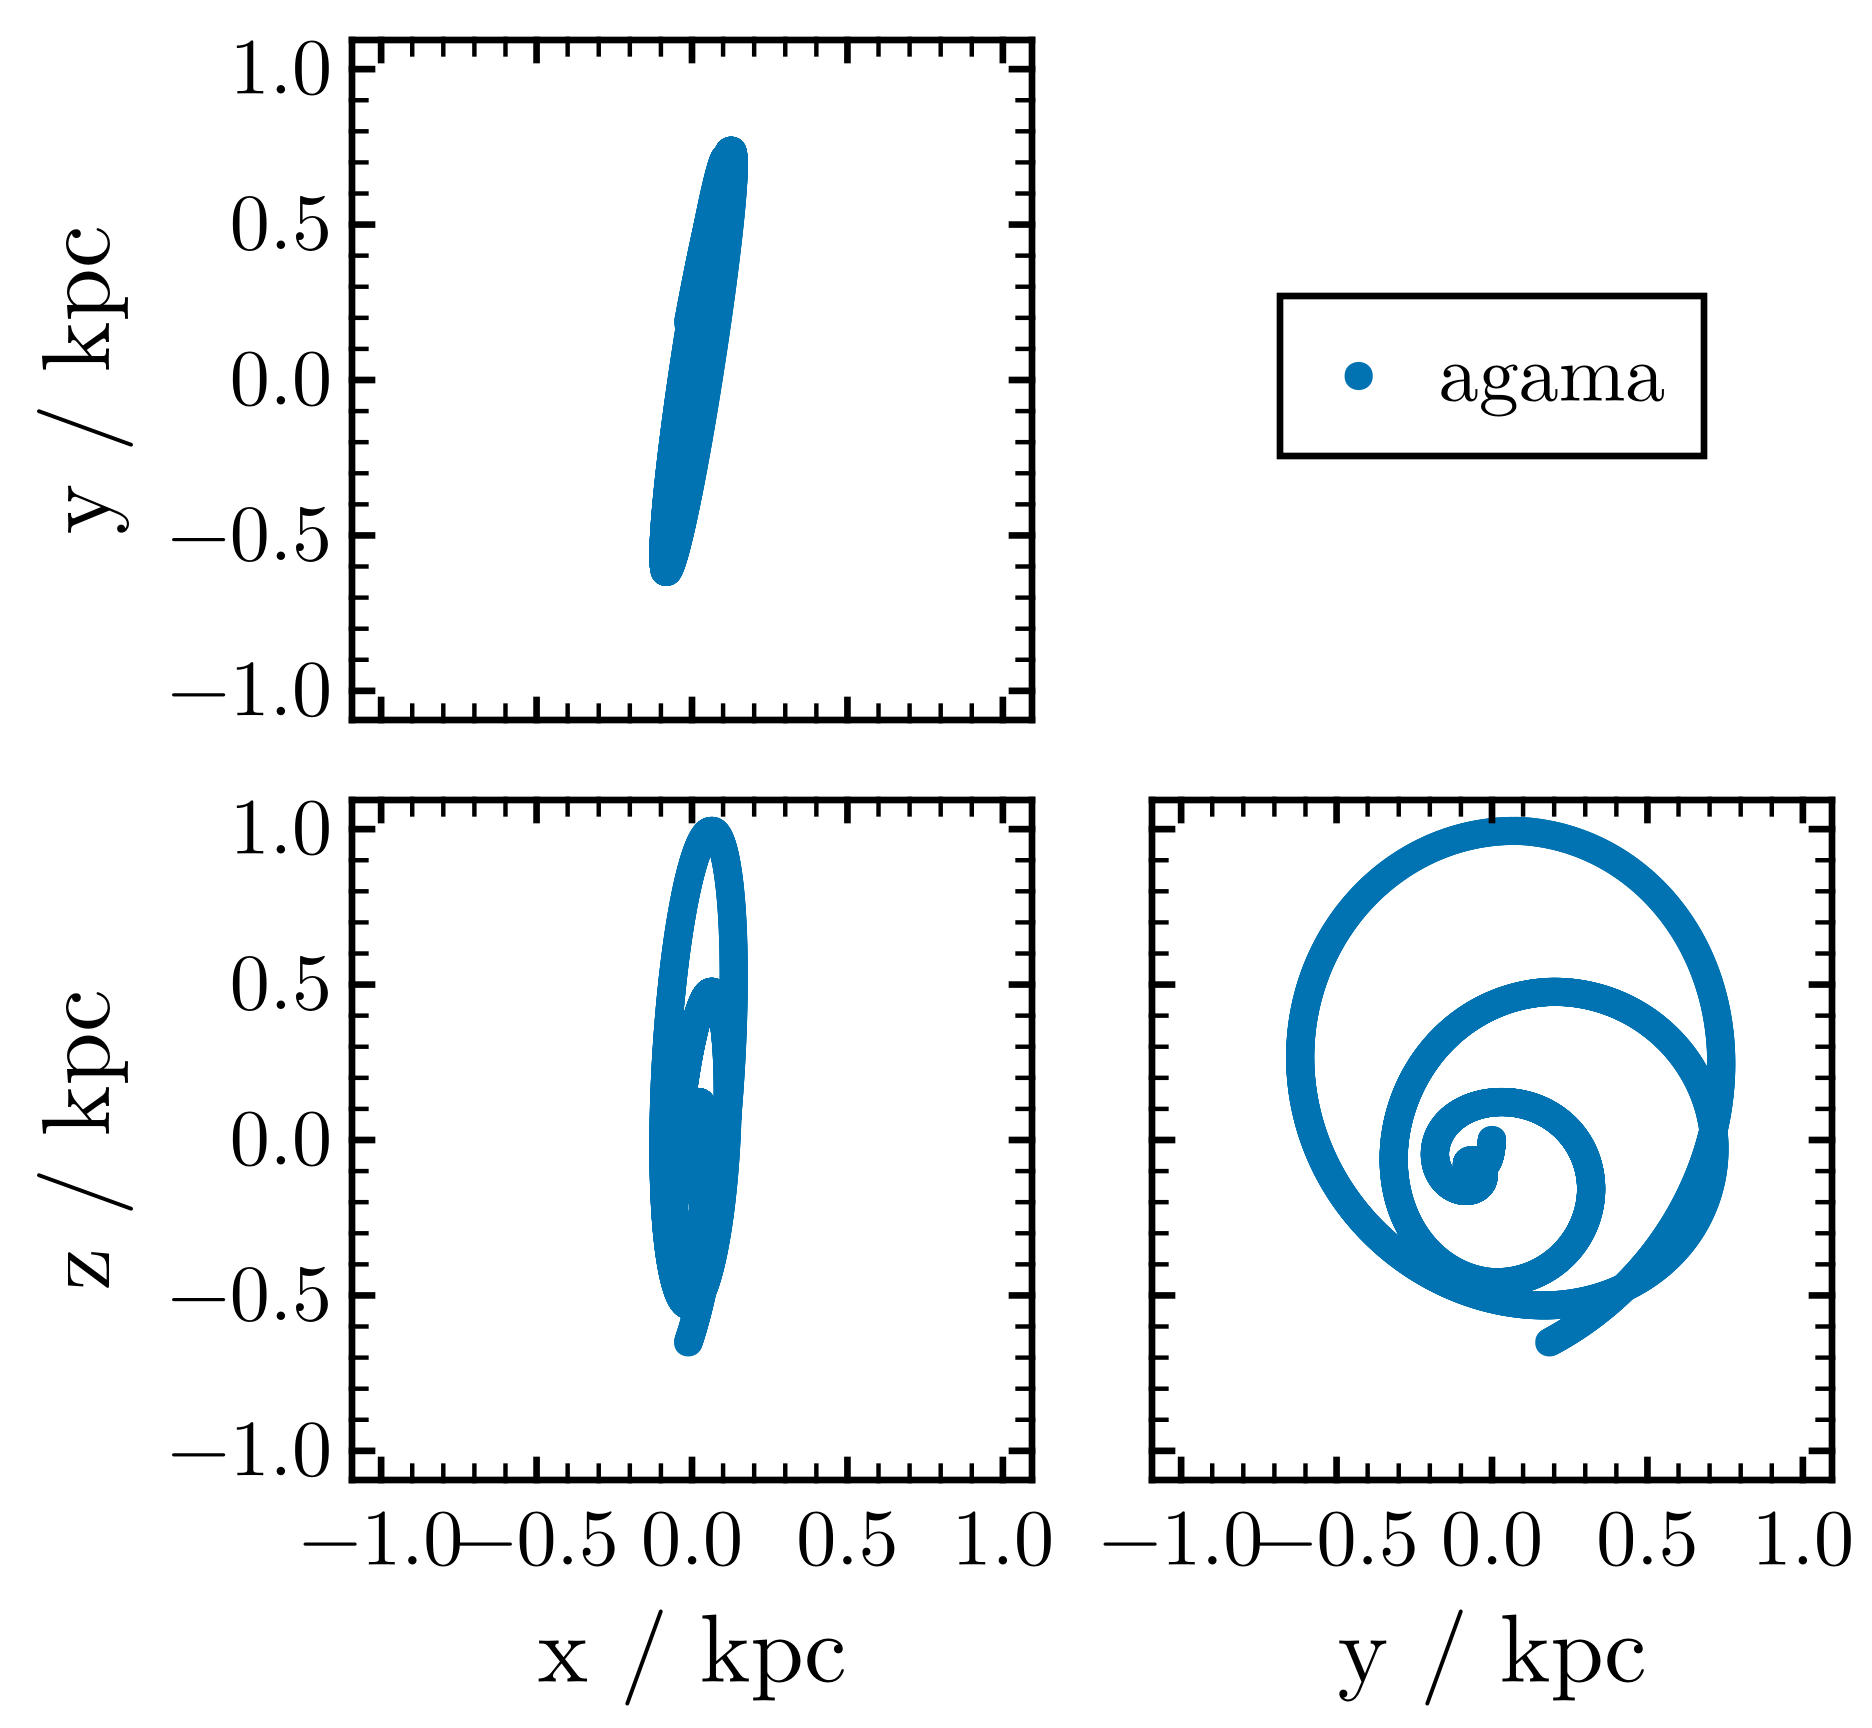

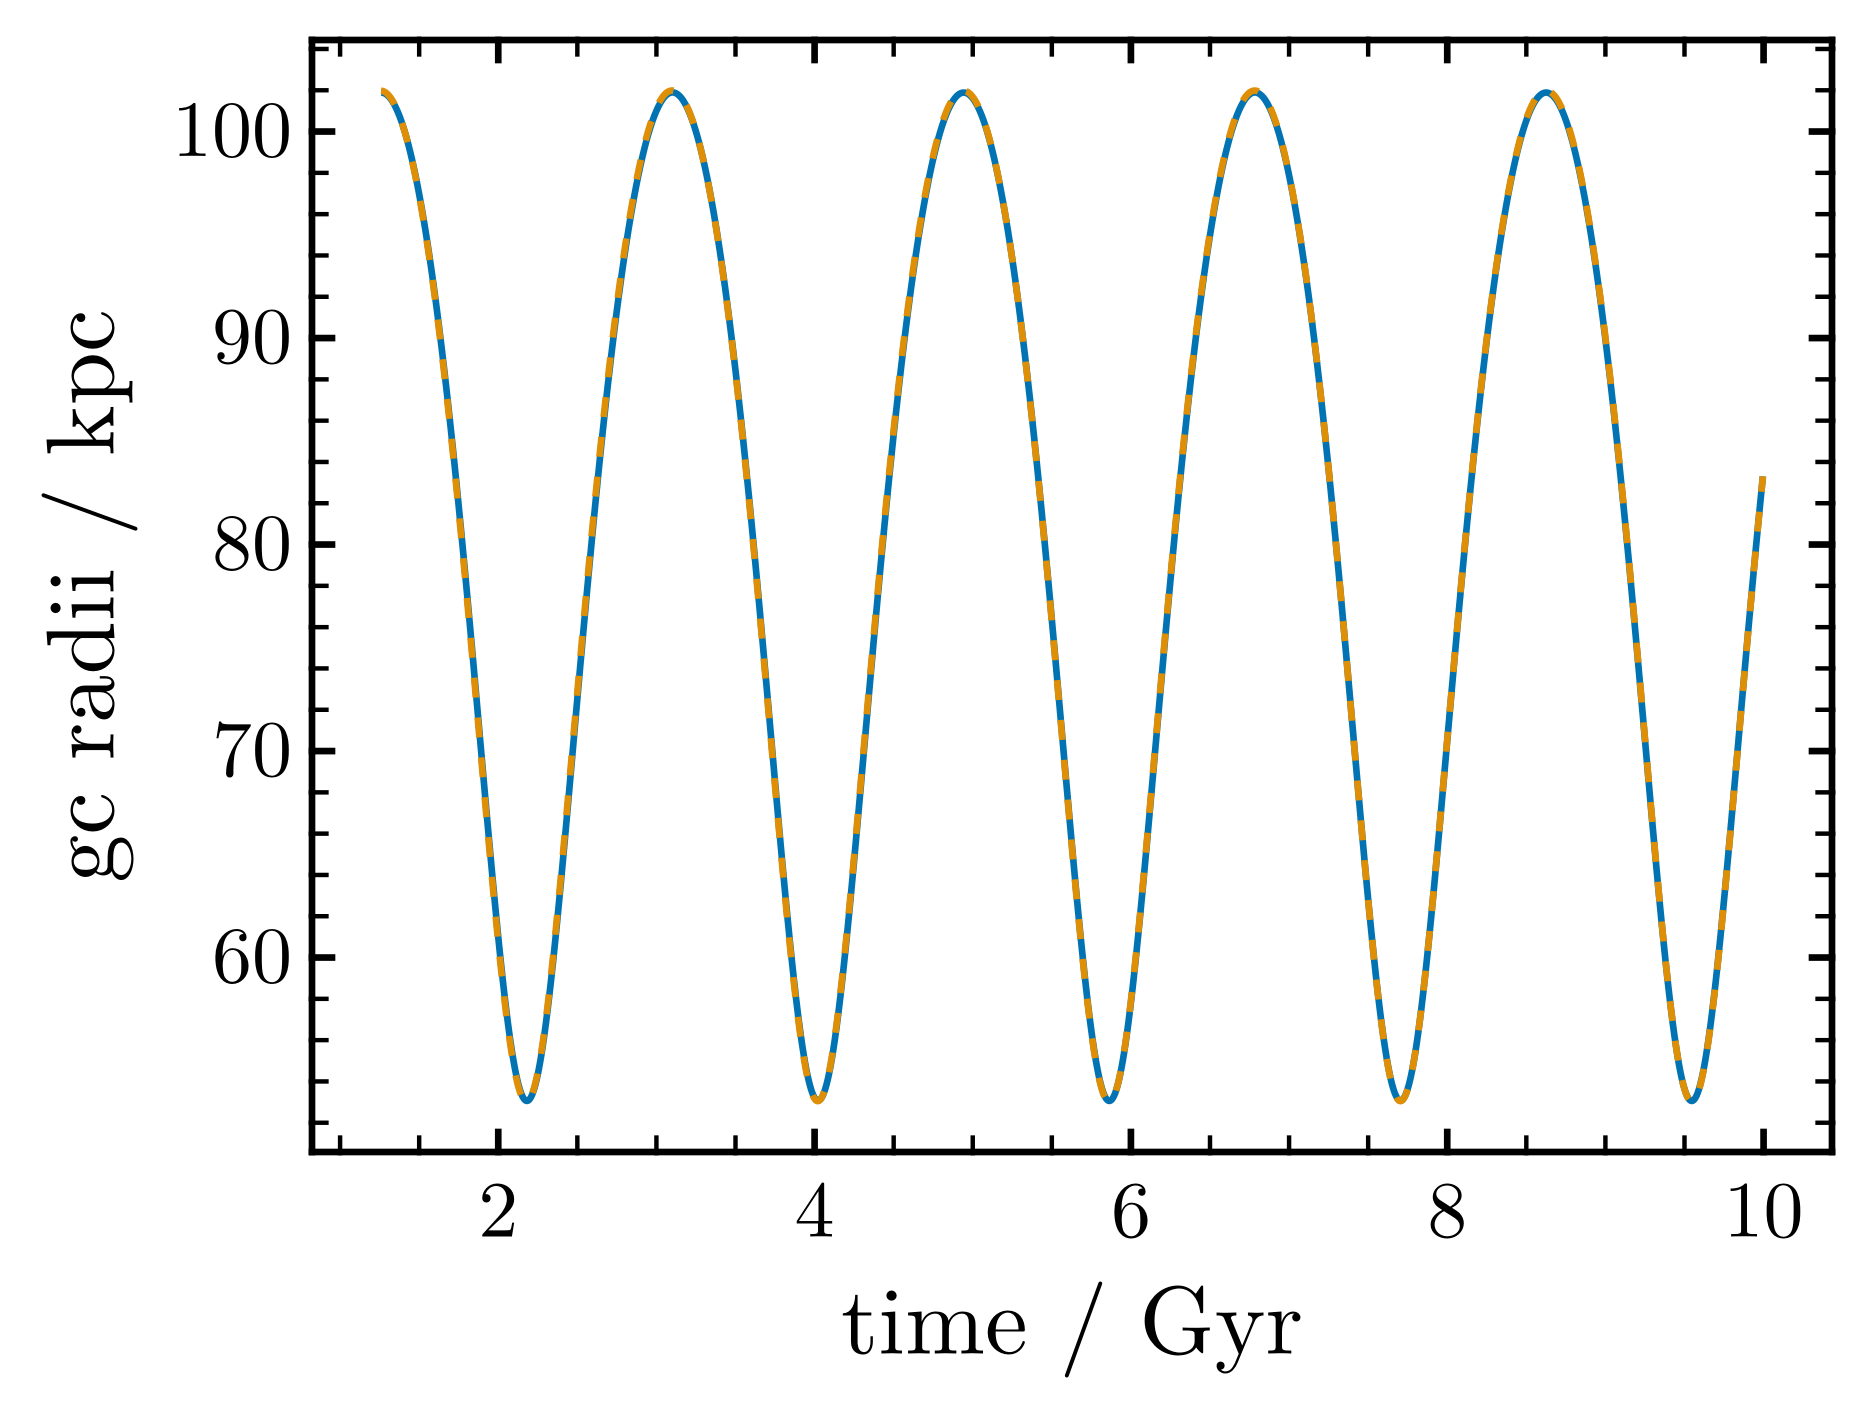

CairoMakie.Screen{IMAGE}


In [127]:
orbits_mean = get_orbits("EP2020", "orbit_mean")
compare(orbits_mean)

delta t final = 0.0000 Gyr 

pos_new =    10.86   170.24    88.46 
pos_old =    10.85   170.25    88.42 
dx_i    =     0.00    -0.01     0.03 

vel_new =    -0.10   -58.85    60.23 
vel_old =    -0.10   -58.84    60.25 
dv_i    =     0.00    -0.01    -0.03 


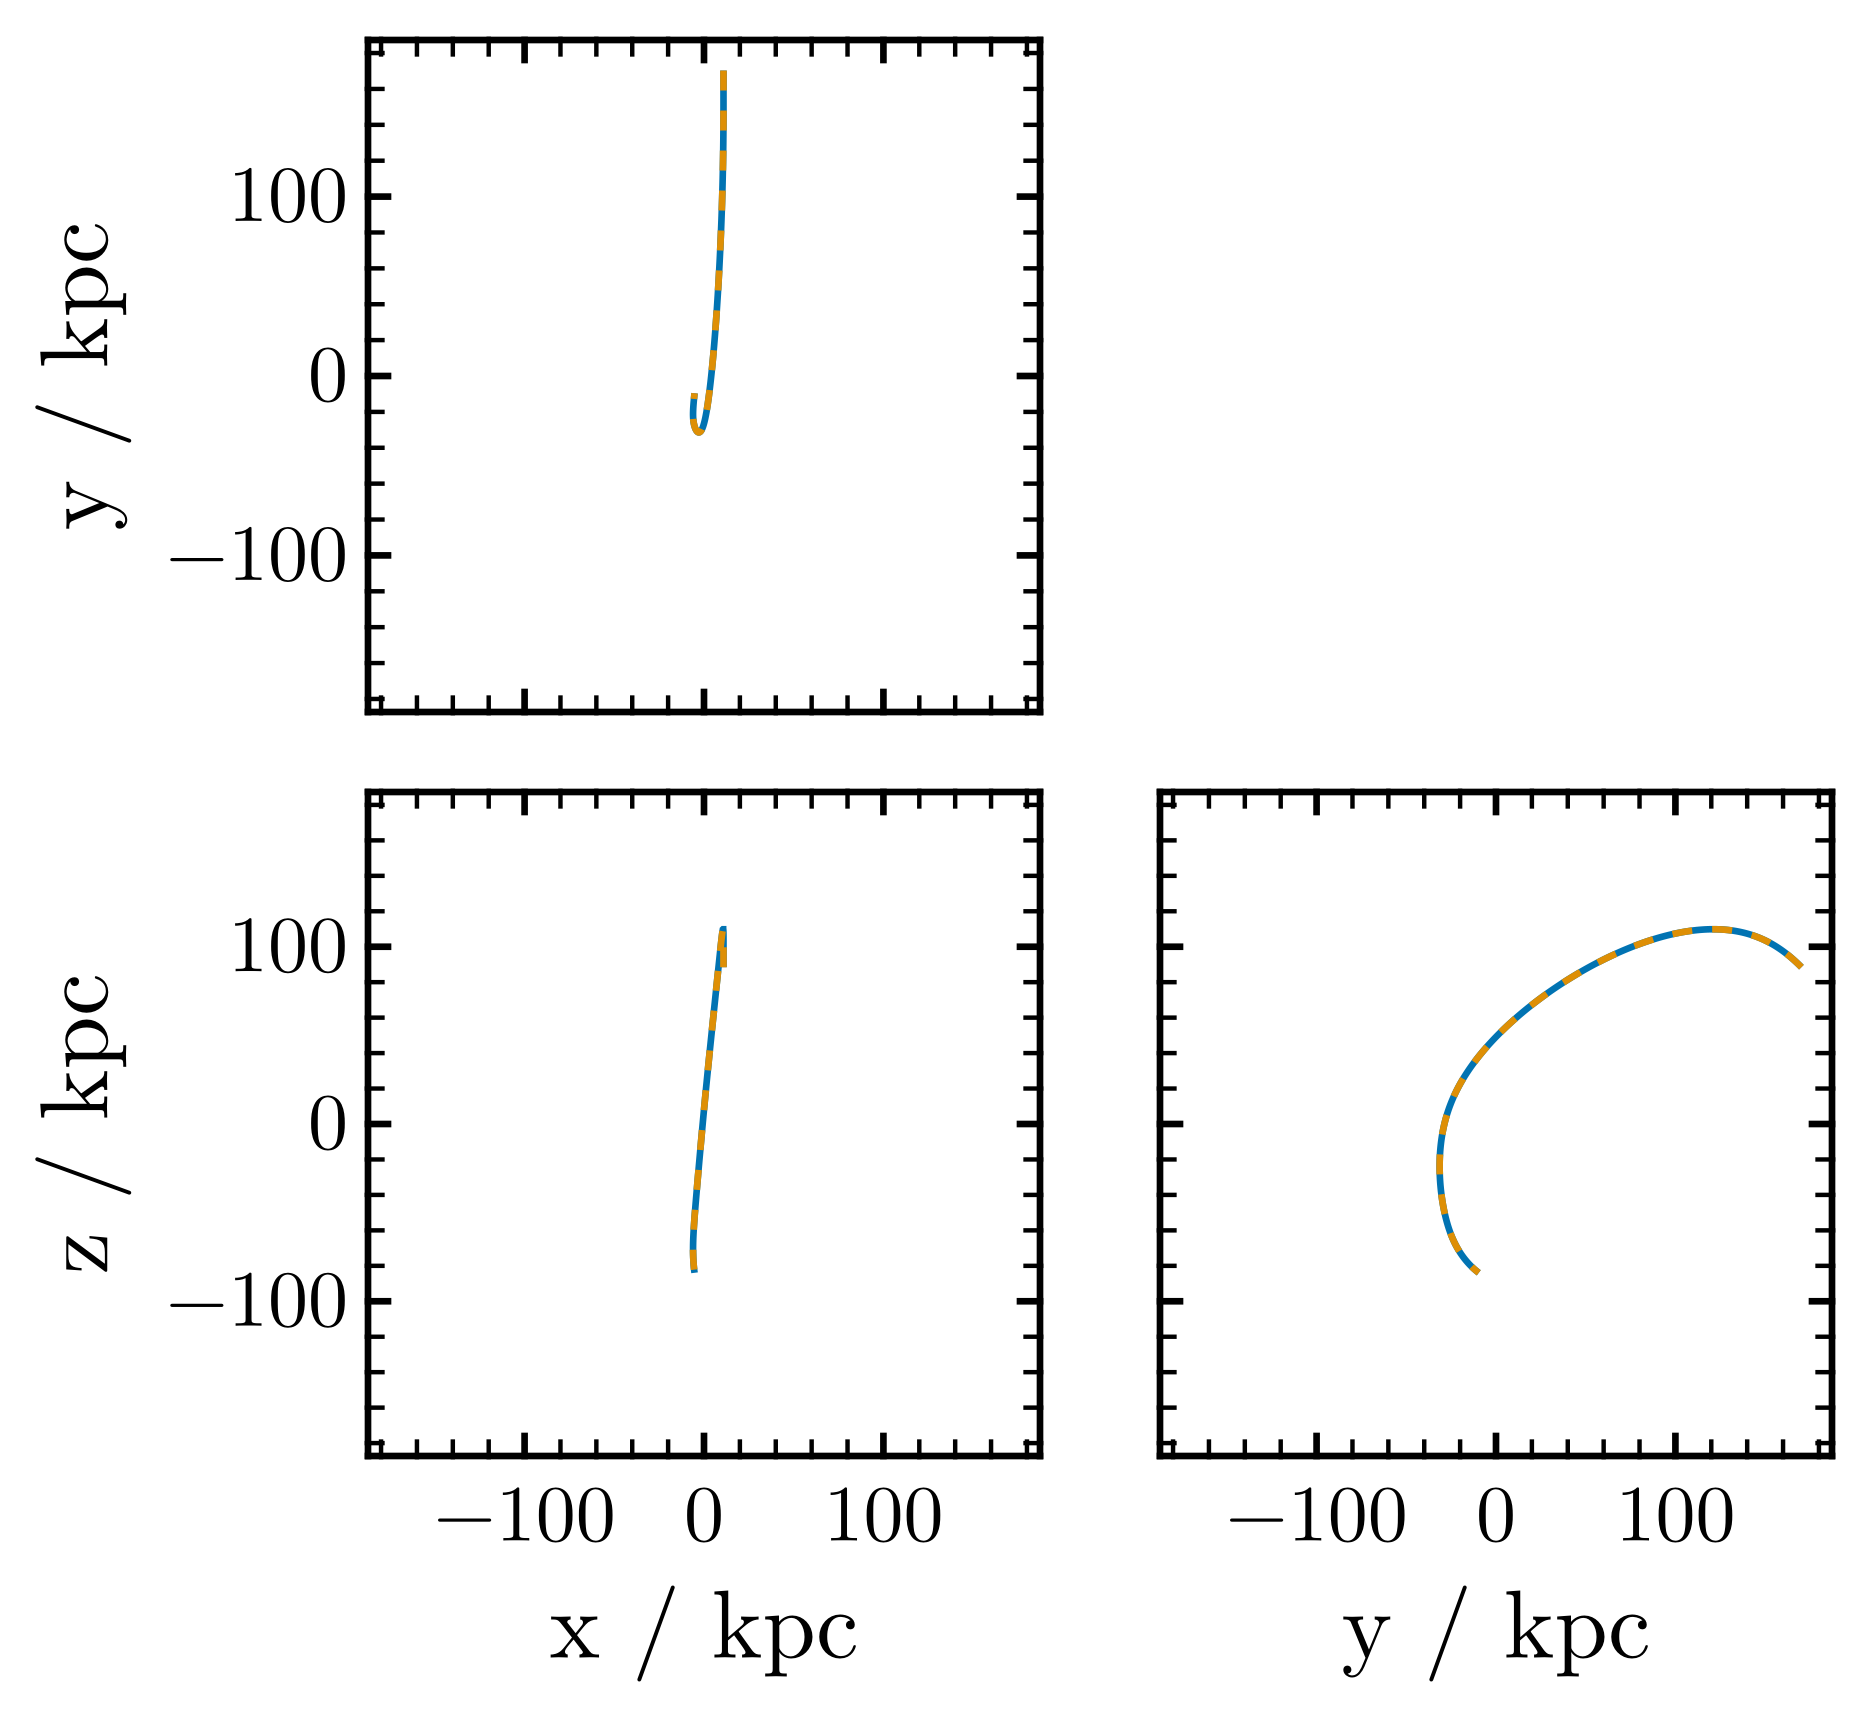

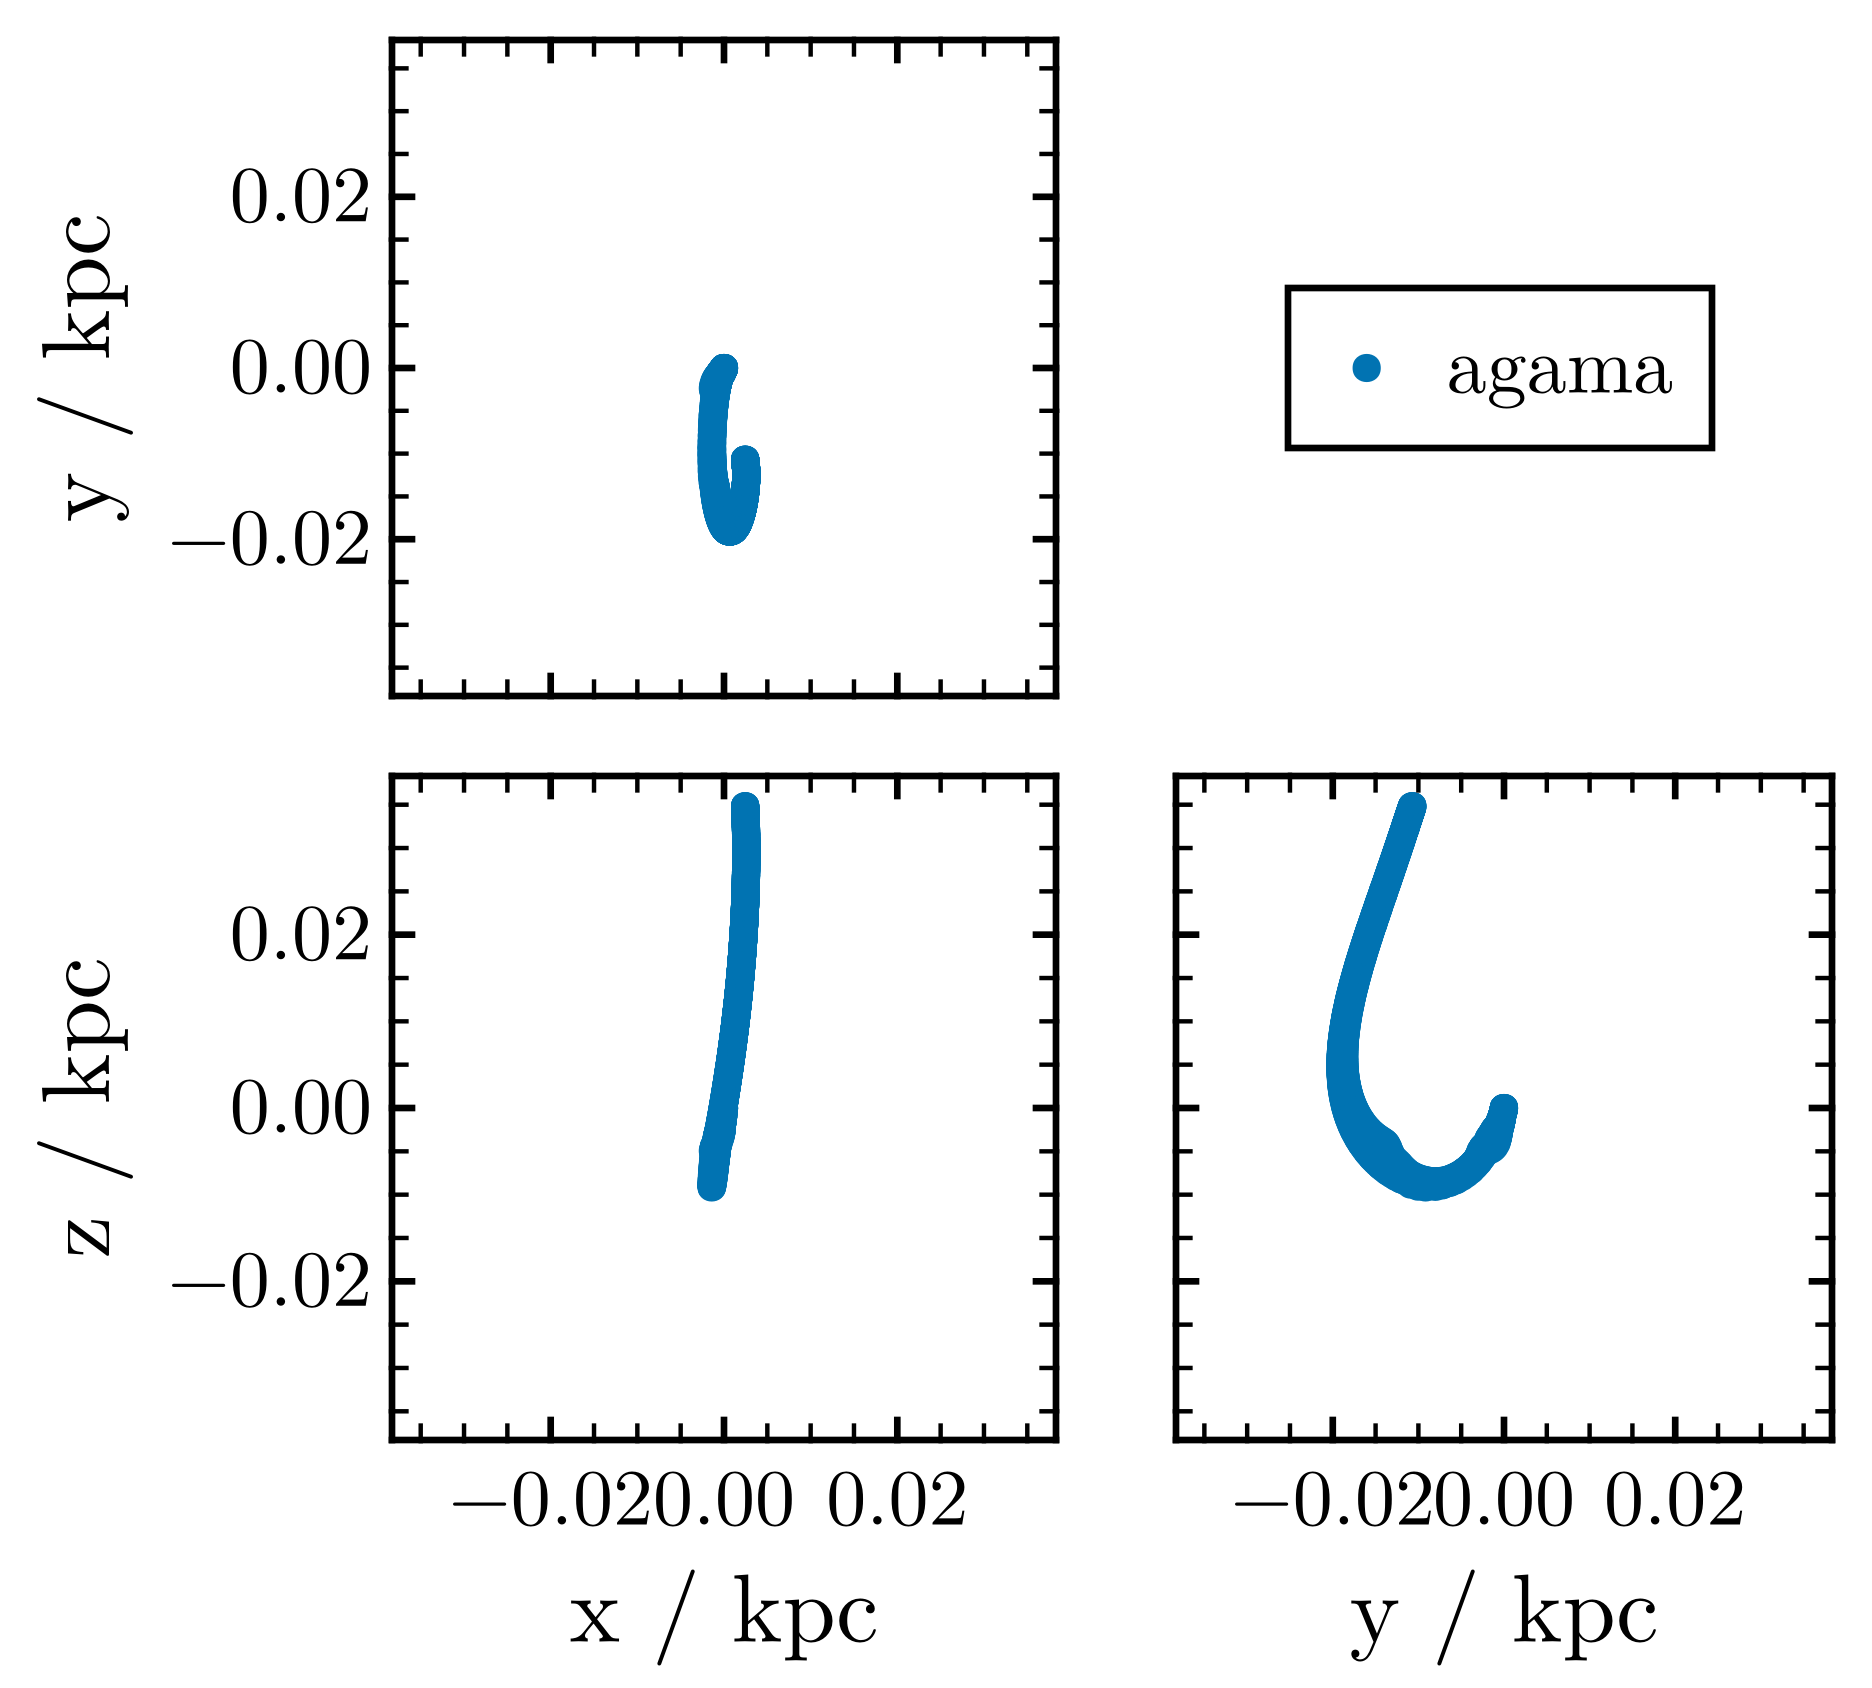

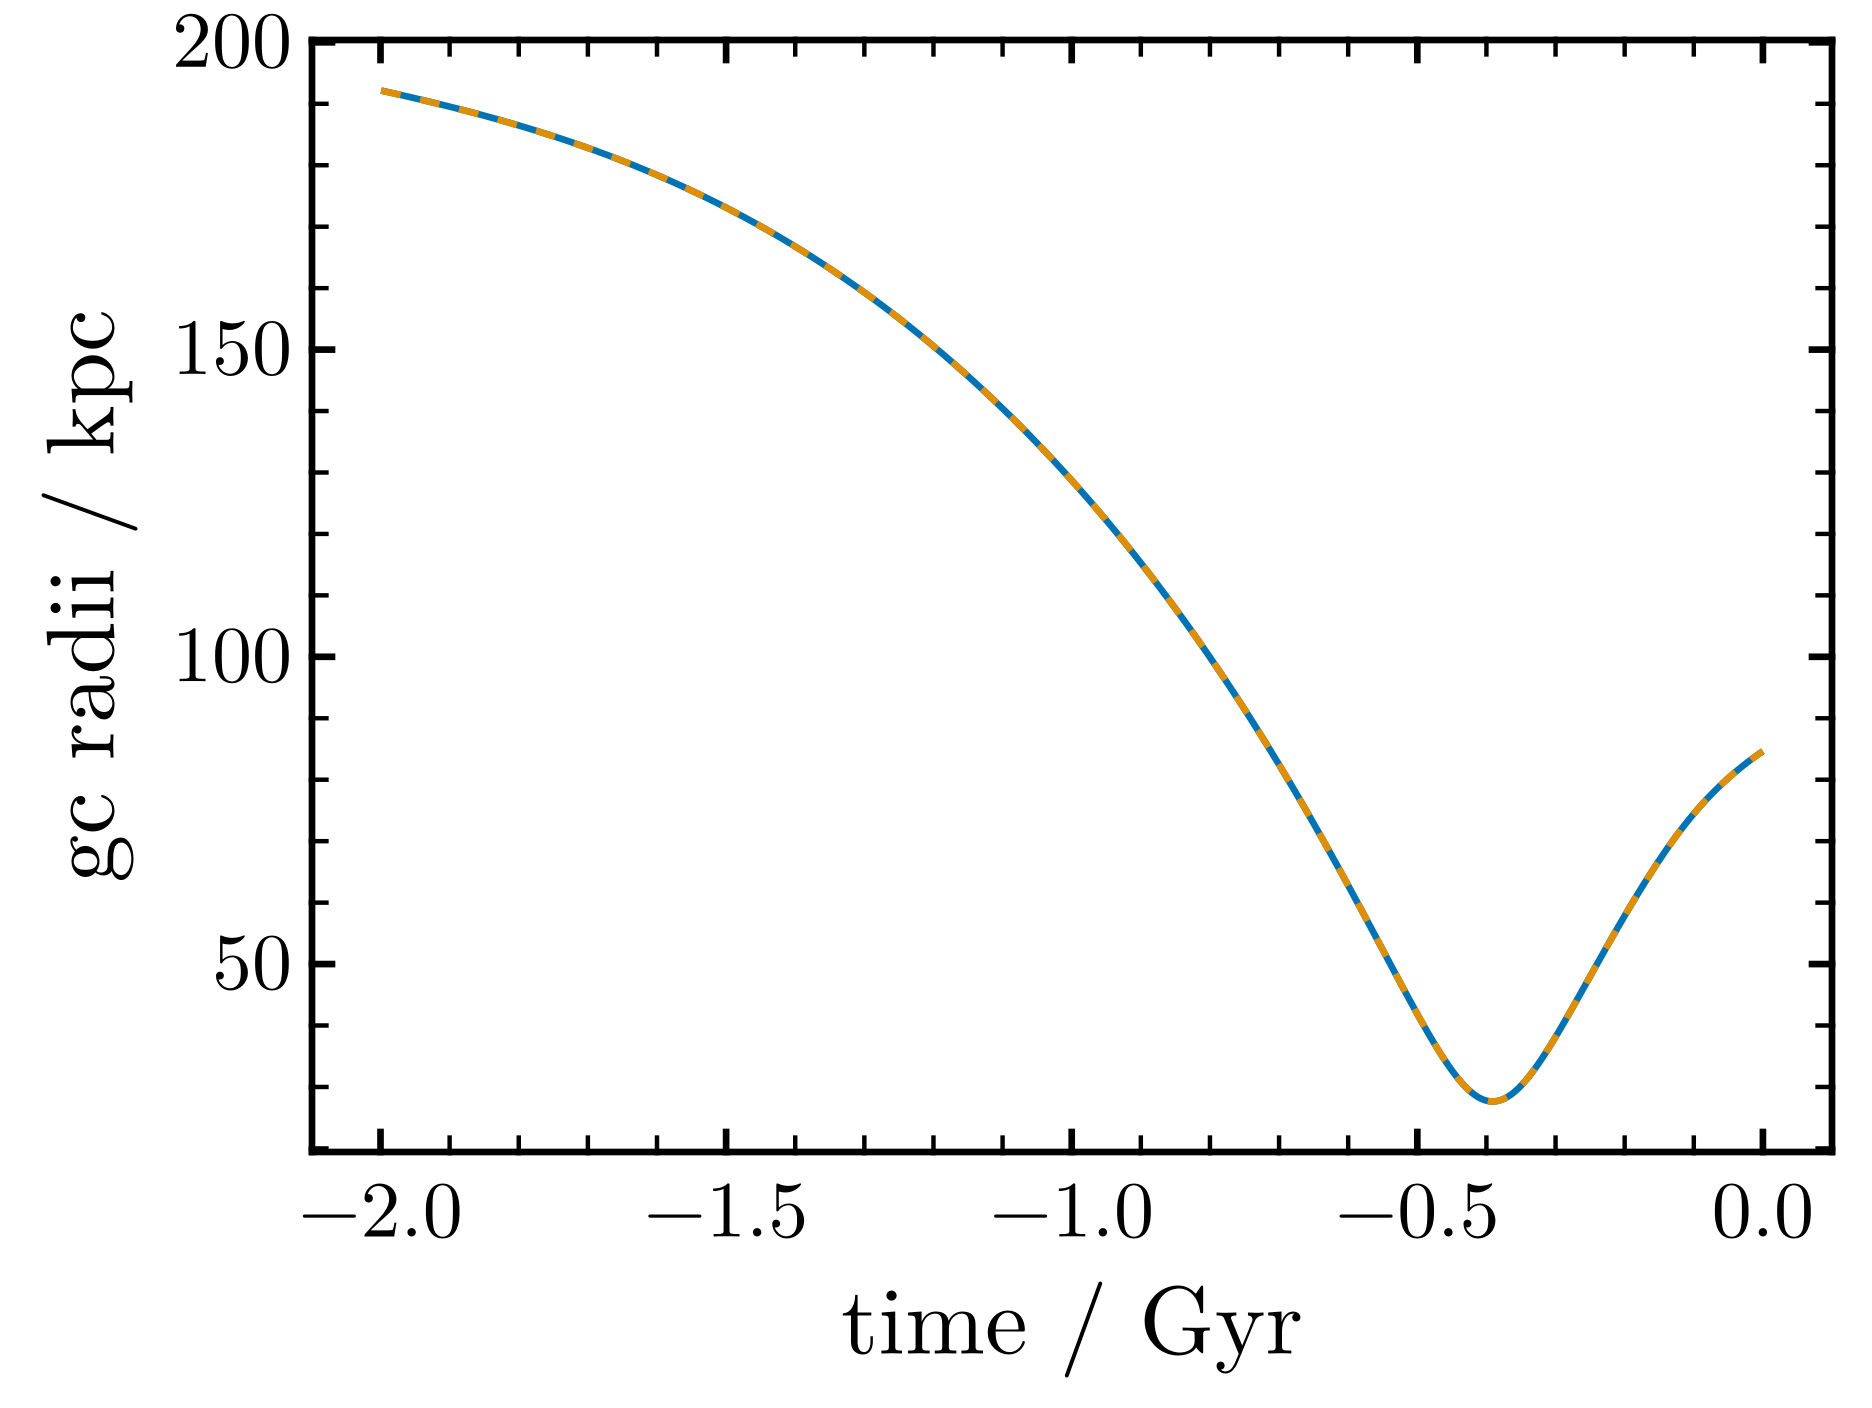

CairoMakie.Screen{IMAGE}


In [142]:
orbits_mean = get_orbits("vasiliev24_L3M11_2x", "orbit_smallperi")
compare(orbits_mean)

delta t final = 0.0000 Gyr 

pos_new =     6.66   135.87   120.47 
pos_old =     6.65   135.88   120.41 
dx_i    =     0.01    -0.02     0.06 

vel_new =     6.99   -53.26    57.75 
vel_old =     6.99   -53.24    57.80 
dv_i    =    -0.00    -0.02    -0.05 


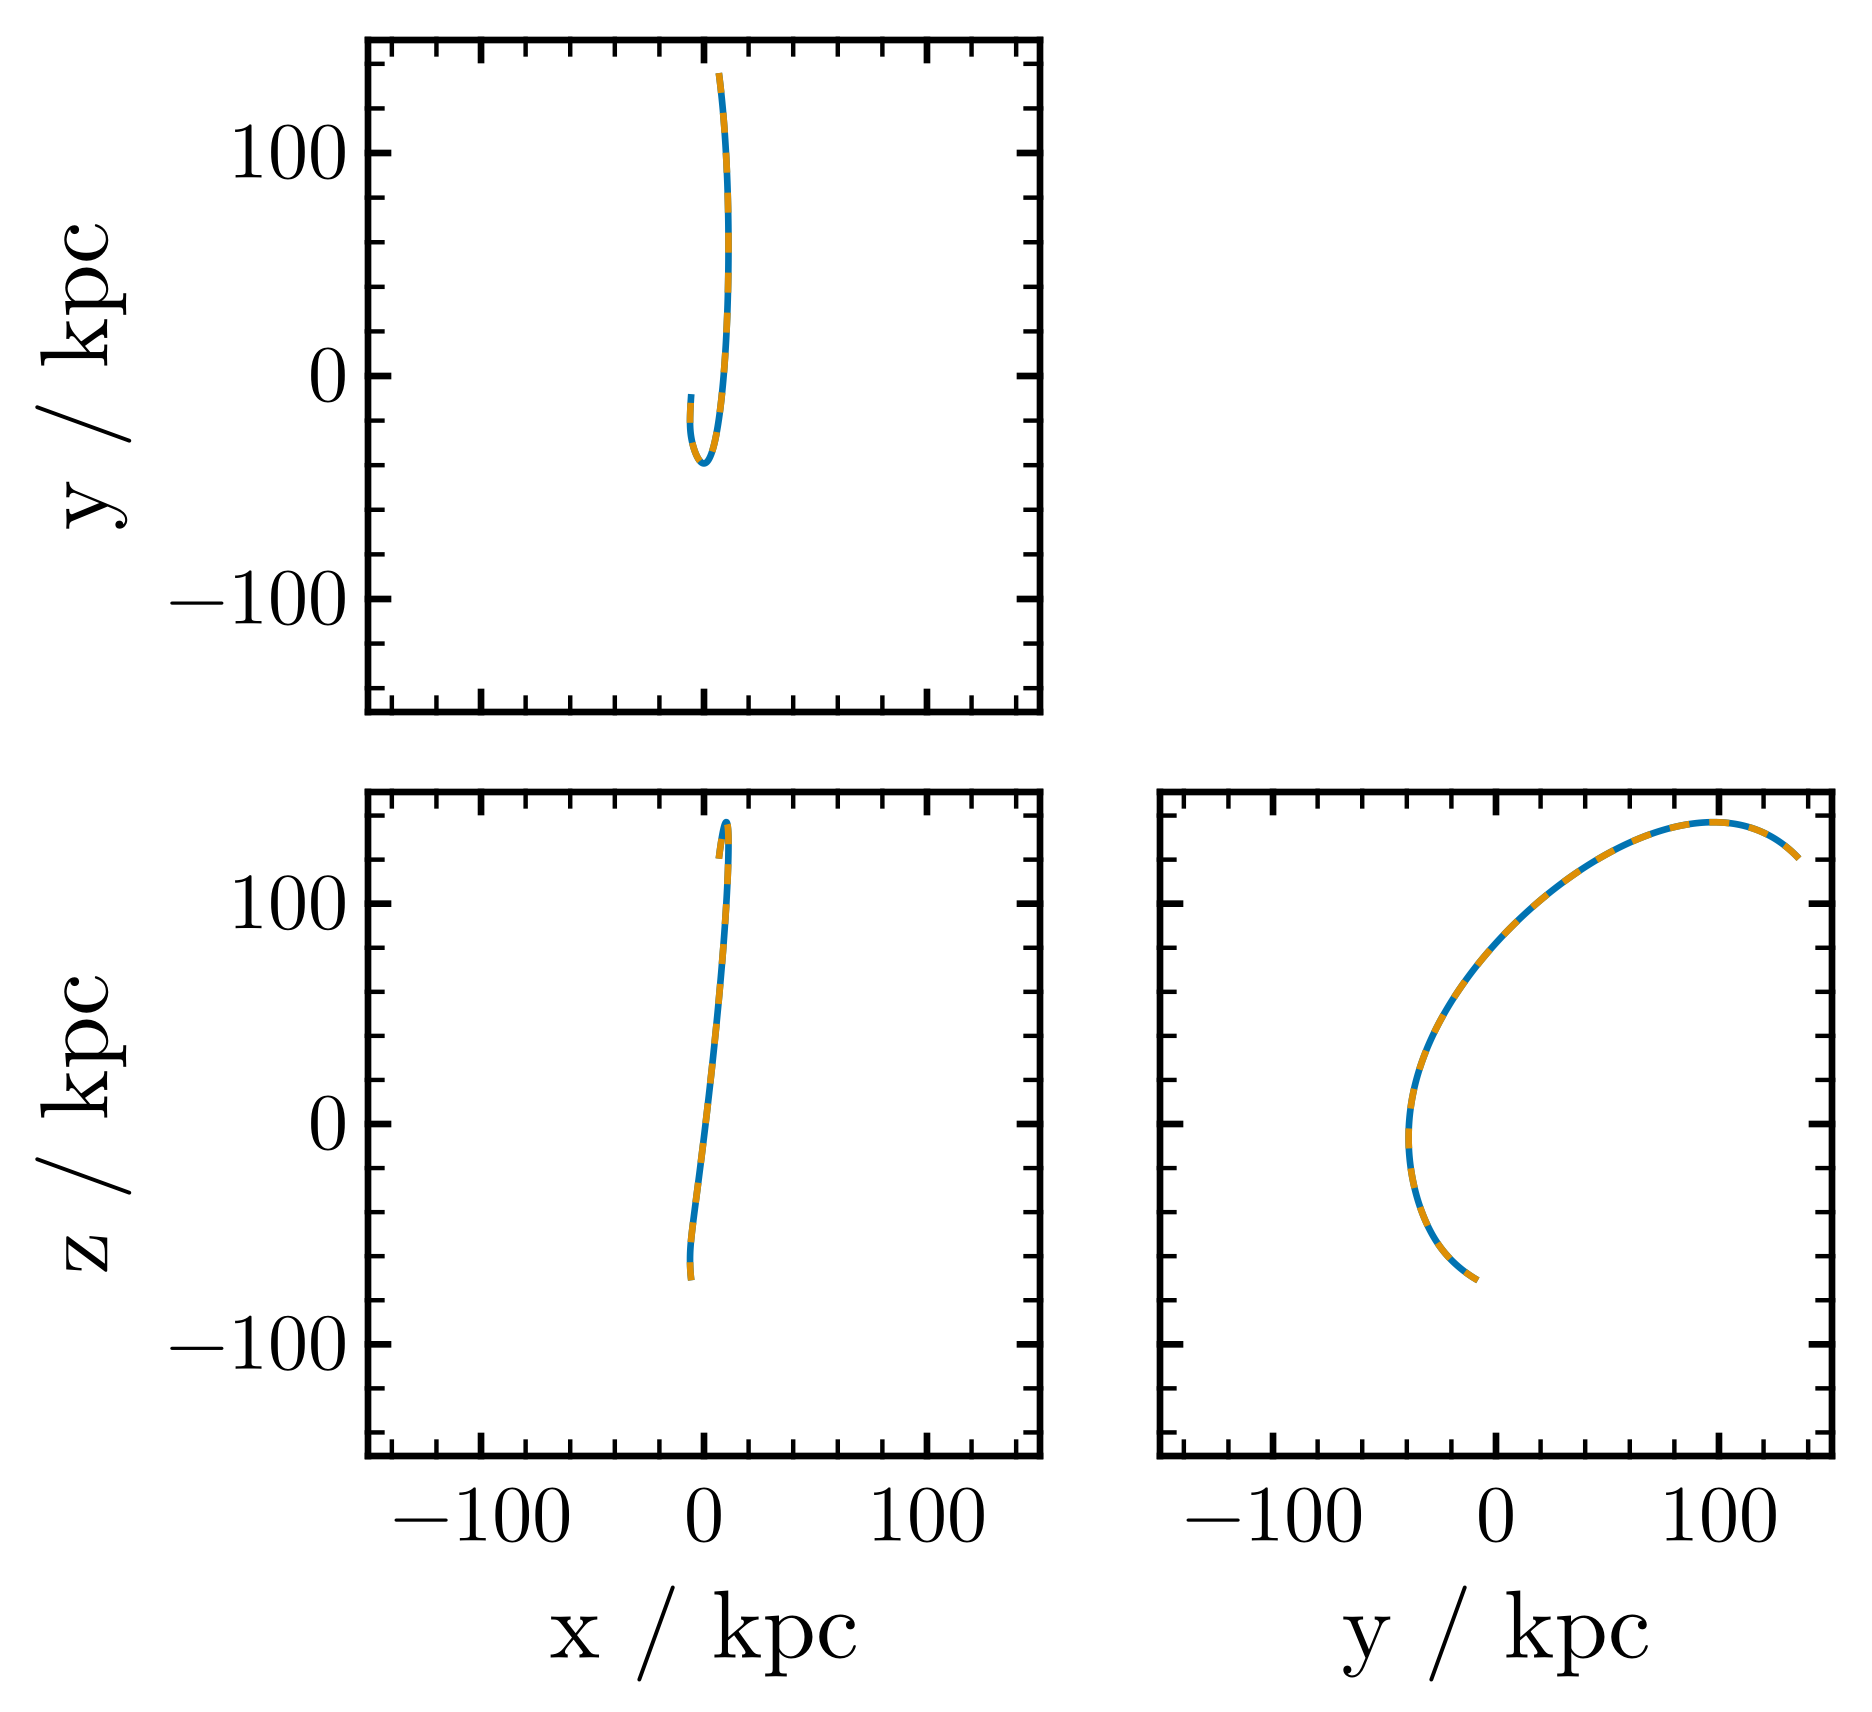

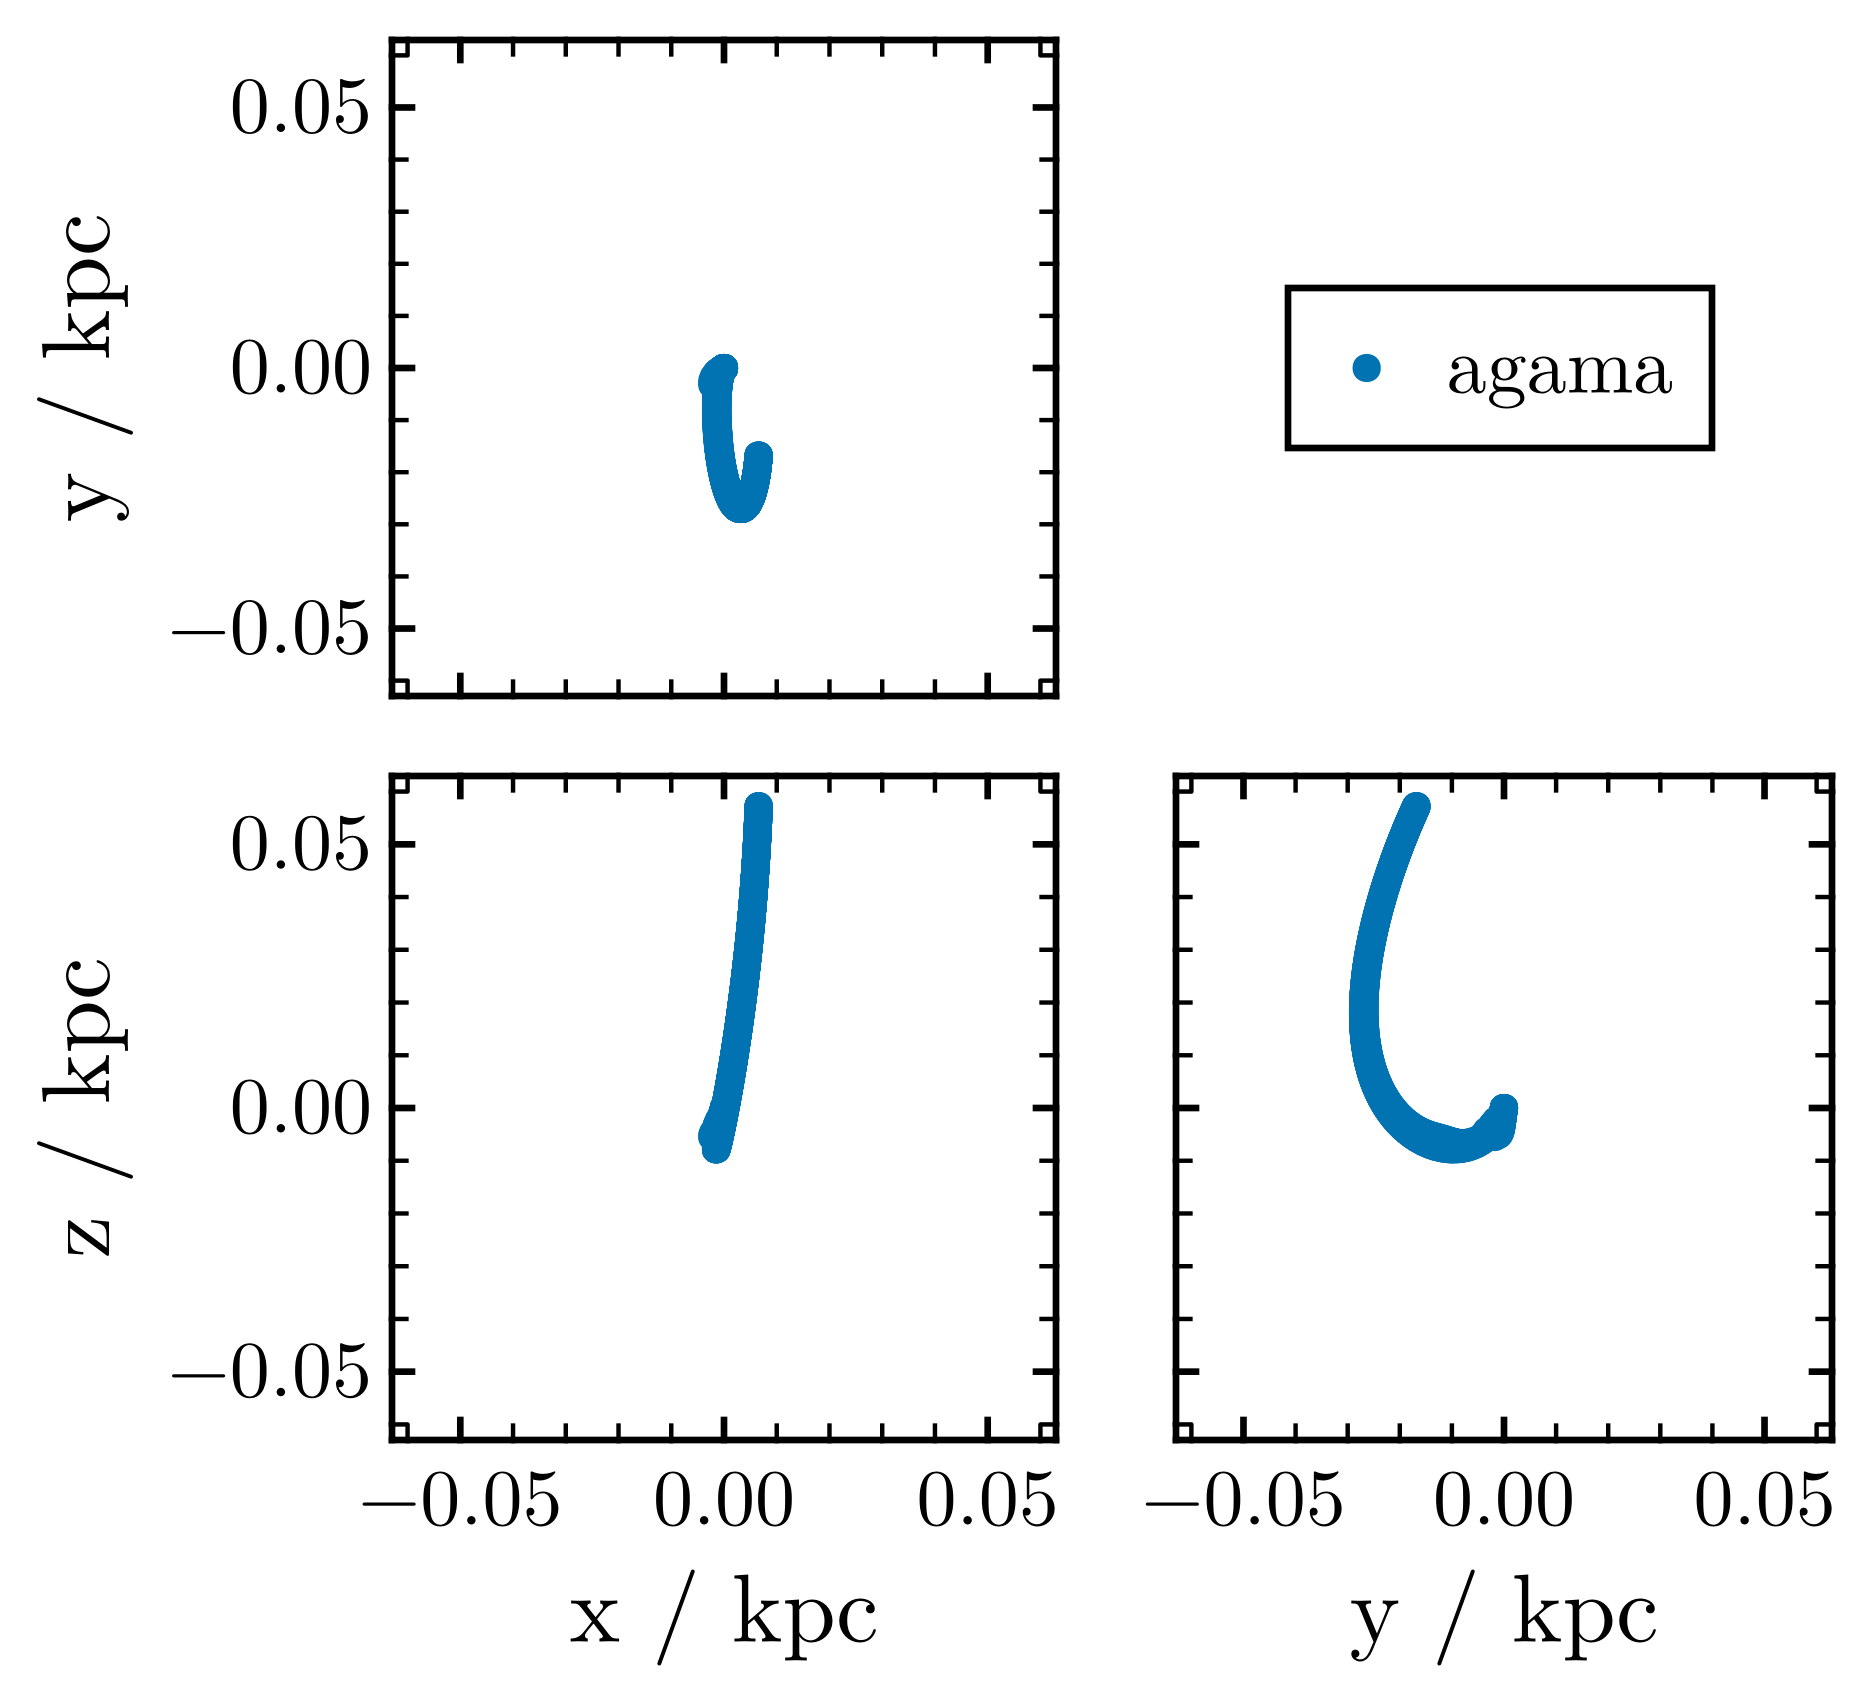

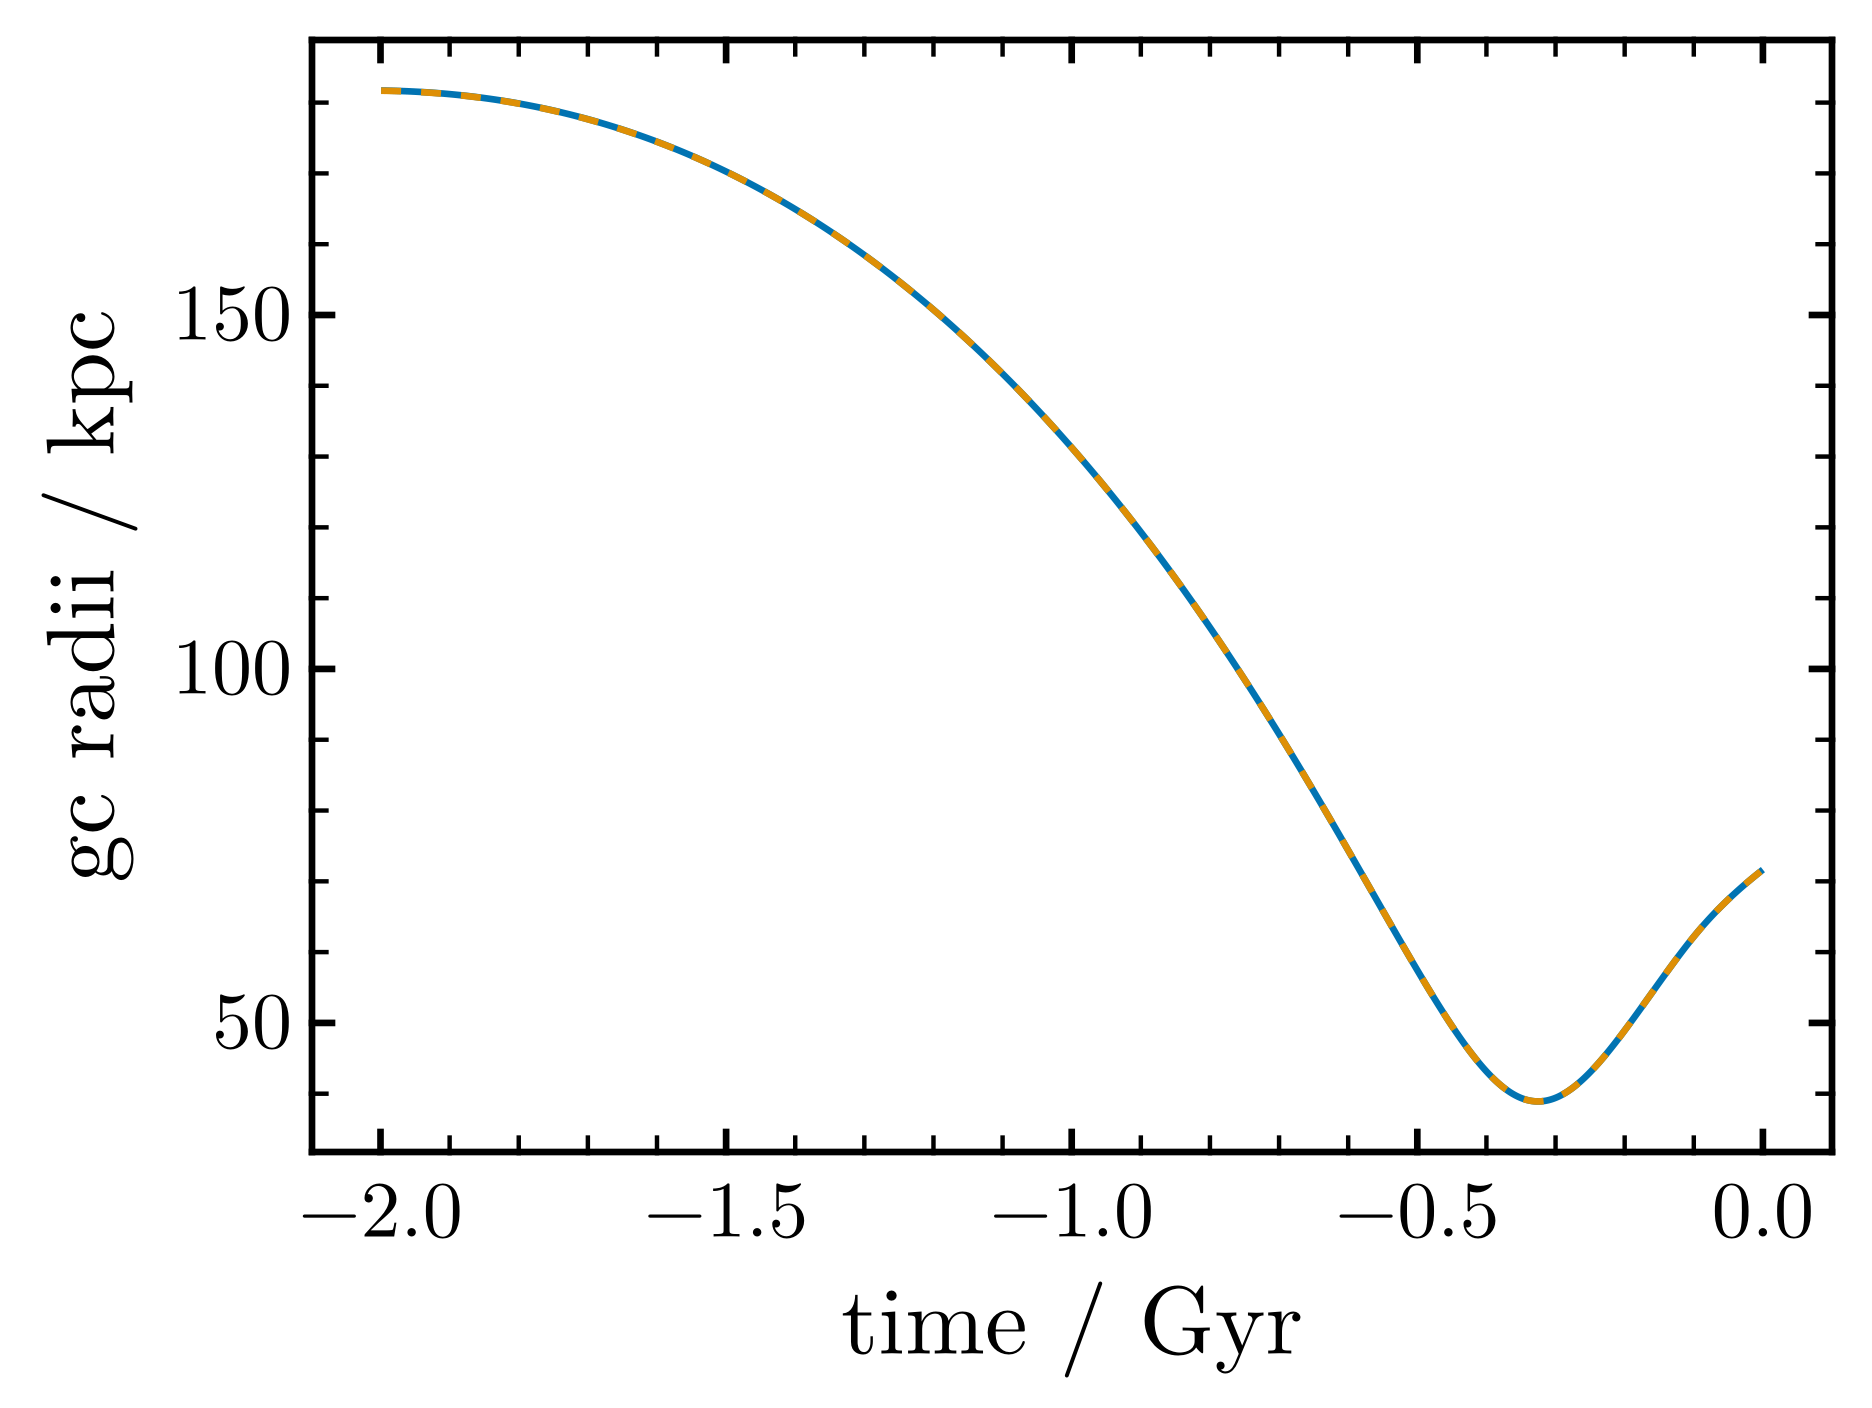

CairoMakie.Screen{IMAGE}


In [143]:
orbits_mean = get_orbits("vasiliev24_L3M11_2x", "orbit_smallperilmc")
compare(orbits_mean)